## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fancyimpute import IterativeImputer
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics 
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
#from cuml.dask.common import utils as dask_utils
warnings.filterwarnings('ignore')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/

## Exploratory data analysis

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/My Drive/DataScience/creditcard.csv')

In [5]:
len(df)

284807

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
#observe the different feature type present in the data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28


### Let's analyse the Time feature

In [9]:



df.Time

0              0.0
1              0.0
2              1.0
3              1.0
4              2.0
            ...   
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, Length: 284807, dtype: float64

### As we saw from data dictionary that the Time column is not the time stamp rather it's the duration in seconds from the first transaction

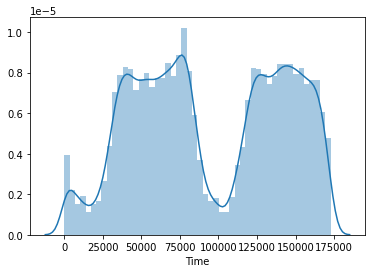

In [10]:



sns.distplot(df.Time)

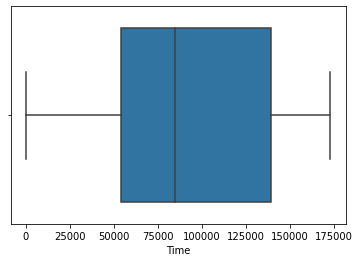

In [11]:

sns.boxplot(df.Time)

In [12]:





df.Time.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99])

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
10%       35027.000000
20%       47694.200000
30%       60776.000000
40%       73261.400000
50%       84692.000000
60%      120396.000000
70%      132929.000000
80%      145247.800000
90%      157640.400000
95%      164143.400000
99%      170560.940000
max      172792.000000
Name: Time, dtype: float64

### Let's create the bins for every 10th percentile for time

In [13]:


arr=np.array(df.Time)
per=[10,20,30,40,50,60,70,80,90]
time_per=[]
for i in per:
  time_per.append(round(np.percentile(arr, i),2))
time_per=np.array(time_per)
time_per

array([ 35027. ,  47694.2,  60776. ,  73261.4,  84692. , 120396. ,
       132929. , 145247.8, 157640.4])

In [14]:
df['time_bins']=pd.qcut(df['Time'],10)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,time_bins
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,"(-0.001, 35027.0]"
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,"(-0.001, 35027.0]"
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,"(-0.001, 35027.0]"
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,"(-0.001, 35027.0]"
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,"(-0.001, 35027.0]"


In [15]:
df.time_bins.value_counts()

(84692.0, 120396.0]     28484
(47694.2, 60776.0]      28483
(-0.001, 35027.0]       28482
(157640.4, 172792.0]    28481
(145247.8, 157640.4]    28481
(73261.4, 84692.0]      28481
(120396.0, 132929.0]    28480
(35027.0, 47694.2]      28480
(60776.0, 73261.4]      28478
(132929.0, 145247.8]    28477
Name: time_bins, dtype: int64

In [16]:
No_of_tran=df.groupby('time_bins')['Class'].count().reset_index(name='No_of_tran')
count_time_default=df[df['Class']==1].groupby('time_bins')['Class'].count().reset_index(name='count_default')
agg_time=No_of_tran.merge(count_time_default,on='time_bins')
agg_time=agg_time.reset_index()
agg_time

,index,time_bins,No_of_tran,count_default
0,0,"(-0.001, 35027.0]",28482,93
1,1,"(35027.0, 47694.2]",28480,64
2,2,"(47694.2, 60776.0]",28483,47
3,3,"(60776.0, 73261.4]",28478,37
4,4,"(73261.4, 84692.0]",28481,28
5,5,"(84692.0, 120396.0]",28484,91
6,6,"(120396.0, 132929.0]",28480,24
7,7,"(132929.0, 145247.8]",28477,33
8,8,"(145247.8, 157640.4]",28481,53
9,9,"(157640.4, 172792.0]",28481,22


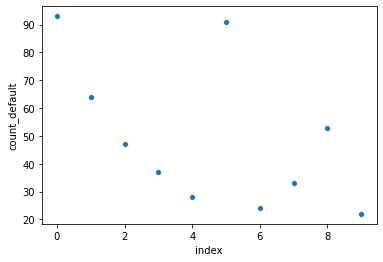

In [17]:
sns.scatterplot(x='index',y='count_default',data=agg_time)

### from the above scatter plot we can see that the number of defaults are highest in 10th percentile and 50th percentiles around  90+ and lowest in 90th percentile

### Let's analyse the amount feature as well

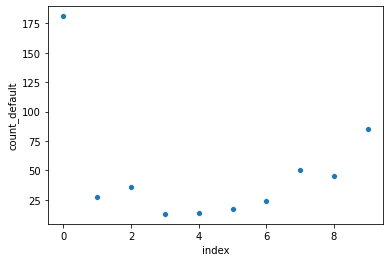

In [18]:
df['amount_bins']=pd.qcut(df['Amount'],10)
No_of_tran=df.groupby('amount_bins')['Class'].count().reset_index(name='No_of_tran')
count_amount_default=df[df['Class']==1].groupby('amount_bins')['Class'].count().reset_index(name='count_default')
agg_amount=No_of_tran.merge(count_amount_default,on='amount_bins')
agg_amount=agg_amount.reset_index()
sns.scatterplot(x='index',y='count_default',data=agg_amount)

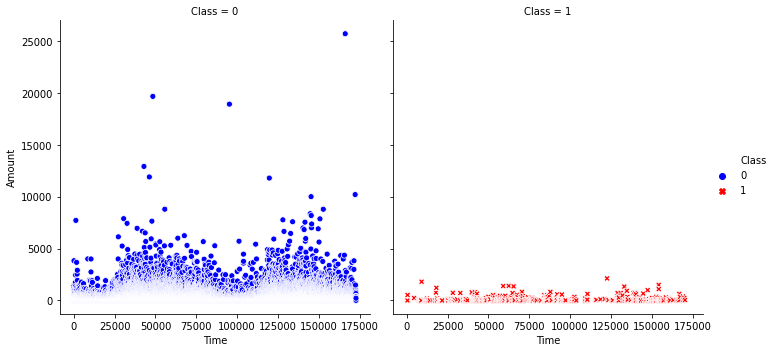

In [19]:

sns.relplot(data=df, x="Time", y="Amount", hue="Class", col="Class", style="Class",
    palette=["b", "r"], sizes=(10, 100))

In [20]:





df.Amount.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
10%           1.000000
20%           3.570000
30%           8.910000
40%          13.000000
50%          22.000000
60%          37.000000
70%          59.800000
80%         100.000000
90%         203.000000
max       25691.160000
Name: Amount, dtype: float64

### From above scatter plot we can see that the maximum number of defaults occur on 10th oercentile of the amount 175 + followed by 90th percentile of amount. The maximum number of defaults in 10th percentile may be because fraudester wanted to check if he can go ayawy by doing the fraudulent transaction by doing a small amount of transaction first

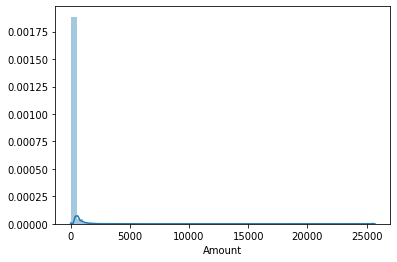

In [21]:
sns.distplot(df.Amount)

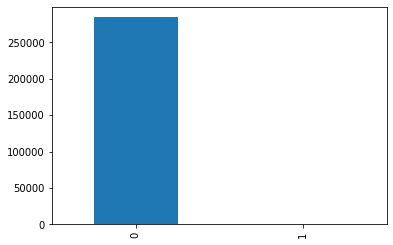

In [22]:
df.Class.value_counts().plot(kind='bar')

In [23]:
print("Percentage of non-fraud transactions are ",len(df[df.Class==0].Class)/len(df))
print("Percentage of fraudulent transactions are ",len(df[df.Class==1].Class)/len(df))

Percentage of non-fraud transactions are  0.9982725143693799
Percentage of fraudulent transactions are  0.001727485630620034


In [24]:
print("Number of non-fraud transactions are ",len(df[df.Class==0].Class))
print("Number of fraudulent transactions are ",len(df[df.Class==1].Class))

Number of non-fraud transactions are  284315
Number of fraudulent transactions are  492




### We can see the Data is highly imbalanced


### Now let's find out if there are any NULL values

In [25]:
def check_null_per(df):
    cols=df.columns
    ind=len(df.index)
    colm=[]
    percnt=[]
    Null=[]
    tot=[]
    for col in cols:
        colm.append(col)
        null=df[col].isna().sum()
        Null.append(null)
        tot.append(ind)
        per=null*100/ind
        percnt.append(per)
    colm=pd.Series(colm)
    percnt=pd.Series(percnt)
    Null=pd.Series(Null)
    total=pd.Series(tot)
    missing_val=pd.concat([colm, Null,total,percnt], axis=1, keys=['Column', 'Null Values','Total Values','Percent of NULL Values']).sort_values(by='Percent of NULL Values',ascending=False)#.set_index(keys='Column',inplace=True)
    missing_val.set_index('Column')
    return(missing_val[missing_val['Percent of NULL Values']>0])

In [26]:
check_null_per(df)

,Column,Null Values,Total Values,Percent of NULL Values


### There is just one NULL value out of 184307 records, so let's drop that row

In [27]:
df=df.dropna()
check_null_per(df)

,Column,Null Values,Total Values,Percent of NULL Values


In [28]:
len(df)

284807

In [29]:
# Drop unnecessary columns
## Let's first drop the bin columns what we have added
df=df.drop(['time_bins','amount_bins'],axis=1)

### Drop the Principal components by checking the variance explained by the components

In [30]:
### Get the number of columns that explain 80% variance
cols=list(df.columns)
cols.remove('Time')
cols.remove('Amount')
cols.remove('Class')
var=[]
for i in cols:
  var.append(round(df[i].var(),2))
from functools import reduce
sm=reduce(lambda x,y : x+y,var)
cum=[]
st=0
for i in range(len(var)):
  st=(st+var[i])
  cum.append(st)
cum_per=[]
for i in cum:
  cum_per.append(i*100/sm)
cum_per
nm_col=0
while cum_per[nm_col]<80:
  nm_col=nm_col+1
nm_col=nm_col+1
print(nm_col,"first Columns of the dataframe explain the 80% variance ")


15 first Columns of the dataframe explain the 80% variance 


In [31]:
cum_per

[12.491867273910215,
 21.372804163955756,
 28.854912166558233,
 35.361093038386464,
 41.57449577098243,
 47.33246584255042,
 52.30969420949903,
 56.96161353285622,
 60.8978529603123,
 64.76903057905011,
 68.1522446324008,
 71.40533506831491,
 74.62589459986987,
 77.61873780091088,
 80.35133376707873,
 82.8562134027326,
 85.19843851659076,
 87.47560182173063,
 89.62264150943396,
 91.54196486662329,
 93.29863370201691,
 95.02277163305139,
 96.2914769030579,
 97.49512036434614,
 98.37345478204294,
 99.1216655823032,
 99.64216005204946,
 100.0]

### Create the final dataframe which will be used for analysis with 15 principal compnents and other 2 variables Amount and Time

In [32]:
col=[]
for i in range(1,nm_col+1):
  col.append('V'+str(i))
col.append('Time')
col.append('Amount')
col.append('Class')
df_final=df[col]
df_final.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,Time,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,0.0,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.0,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,1.0,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,1.0,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,2.0,69.99,0


### Splitting the data into train & test data

In [33]:
y= df_final['Class']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [34]:
X=df_final.drop('Class',axis=1)

In [35]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=100)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [36]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
350
142


### Plotting the distribution of a variable

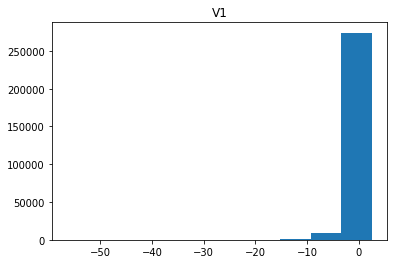

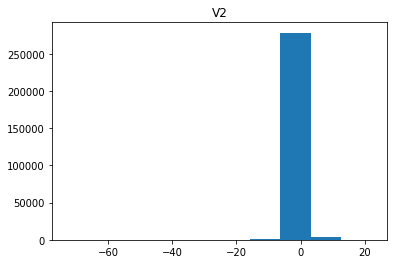

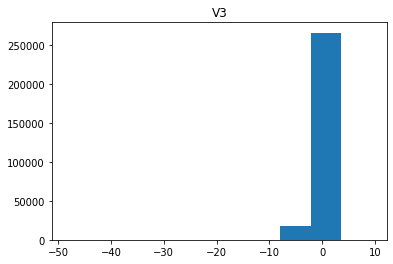

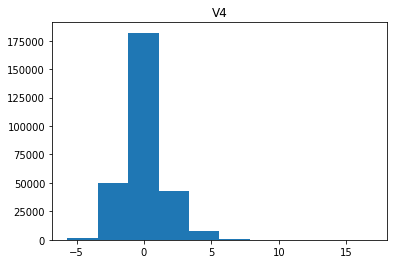

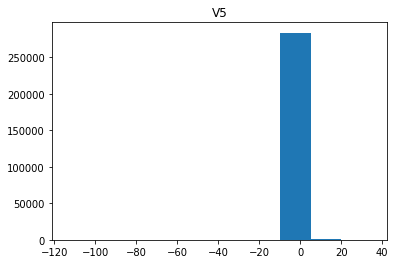

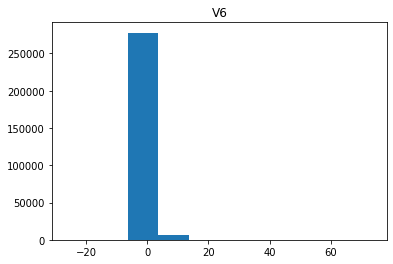

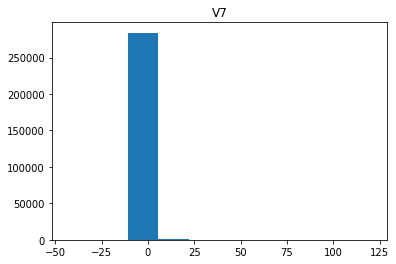

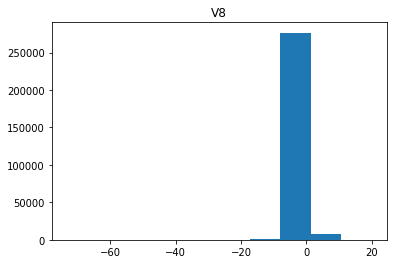

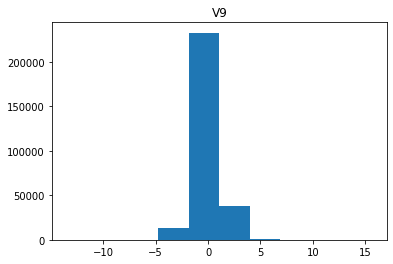

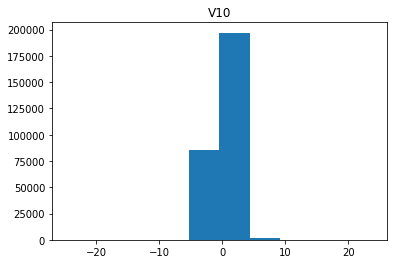

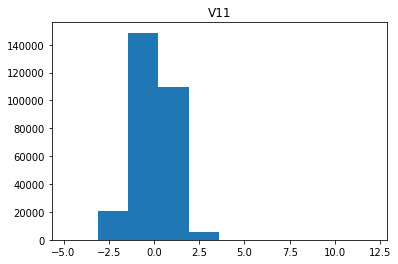

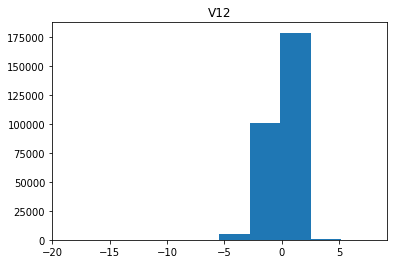

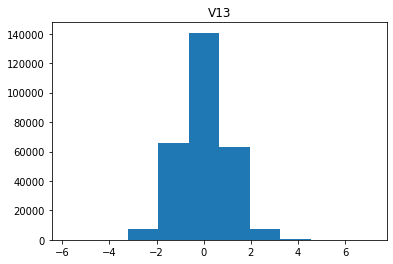

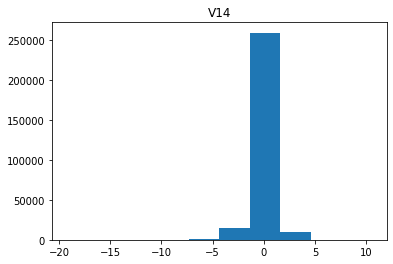

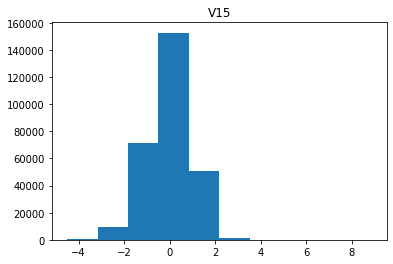

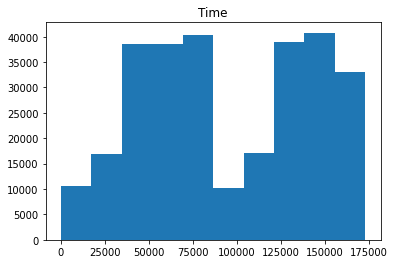

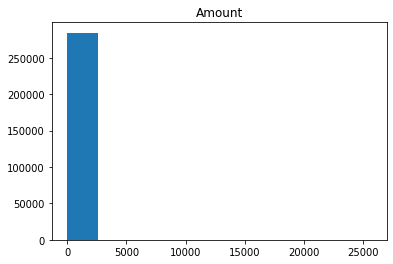

In [37]:
# plot the histogram of a variable from the dataset to see the skewness
for i in X.columns:
  plt.hist(x=i,data=X)
  plt.title(i)
  plt.show()

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian
### We can see that Amount and time are the columns which are skewed, so let's apply Power Transformer on these columns

In [38]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
tempX_train=X_train
tempX_test=X_test
Pow_tran=sklearn.preprocessing.PowerTransformer(method='yeo-johnson',copy=False)
tempX_train=Pow_tran.fit_transform(tempX_train)
tempX_train=pd.DataFrame(tempX_train)
tempX_train.columns=X_train.columns
tempX_test=Pow_tran.transform(tempX_test)
tempX_test=pd.DataFrame(tempX_test)
tempX_test.columns=X_test.columns

(array([2.1934e+04, 2.1240e+04, 3.1556e+04, 3.8177e+04, 3.8326e+04,
        2.9540e+04, 1.3862e+04, 4.1290e+03, 5.7400e+02, 2.6000e+01]),
 array([-2.0137969 , -1.45753498, -0.90127305, -0.34501113,  0.21125079,
         0.76751271,  1.32377464,  1.88003656,  2.43629848,  2.9925604 ,
         3.54882233]),
 <a list of 10 Patch objects>)

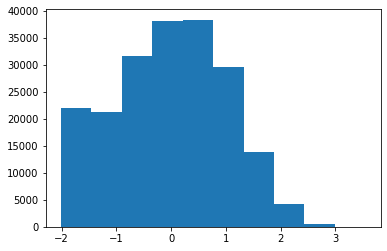

In [39]:
plt.hist(x='Amount',data=tempX_train)

In [40]:
X_train=tempX_train
X_test=tempX_test

(array([ 4733.,  3774., 13105., 25512., 27775., 28605.,  6252., 24345.,
        34261., 31002.]),
 array([-2.4386823 , -2.04123585, -1.6437894 , -1.24634295, -0.84889649,
        -0.45145004, -0.05400359,  0.34344286,  0.74088932,  1.13833577,
         1.53578222]),
 <a list of 10 Patch objects>)

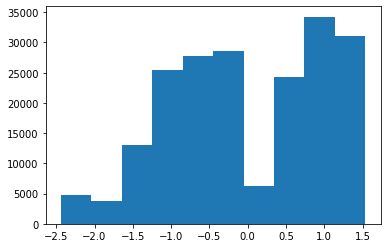

In [41]:
plt.hist(x='Time',data=X_train)

(array([2.1934e+04, 2.1240e+04, 3.1556e+04, 3.8177e+04, 3.8326e+04,
        2.9540e+04, 1.3862e+04, 4.1290e+03, 5.7400e+02, 2.6000e+01]),
 array([-2.0137969 , -1.45753498, -0.90127305, -0.34501113,  0.21125079,
         0.76751271,  1.32377464,  1.88003656,  2.43629848,  2.9925604 ,
         3.54882233]),
 <a list of 10 Patch objects>)

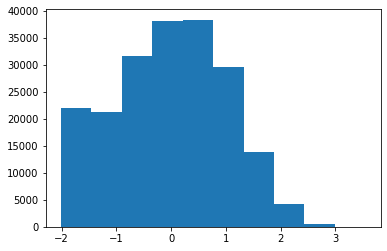

In [42]:
plt.hist(x='Amount',data=X_train)

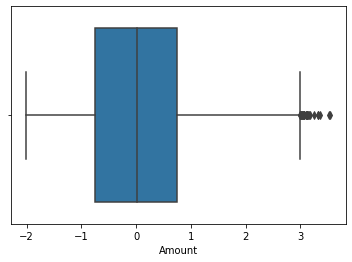

In [43]:
sns.boxplot(x='Amount',data=X_train)

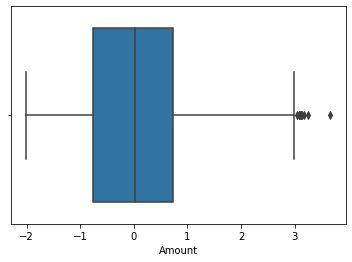

In [44]:
sns.boxplot(x='Amount',data=X_test)

In [45]:
### Let's scale the Amount variable
scaler = MinMaxScaler()
X_train[['Amount']] = scaler.fit_transform(X_train[['Amount']])
X_train['Amount'].describe()

count    199364.000000
mean          0.362023
std           0.179772
min           0.000000
25%           0.227309
50%           0.366558
75%           0.496864
max           1.000000
Name: Amount, dtype: float64

In [46]:
X_test[['Amount']] = scaler.transform(X_test[['Amount']])
X_test['Amount'].describe()

count    85443.000000
mean         0.360831
std          0.179289
min          0.000000
25%          0.225382
50%          0.366084
75%          0.494643
max          1.021363
Name: Amount, dtype: float64

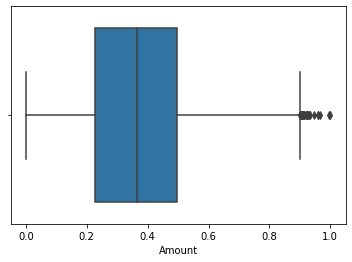

In [47]:
sns.boxplot(x='Amount',data=X_train)

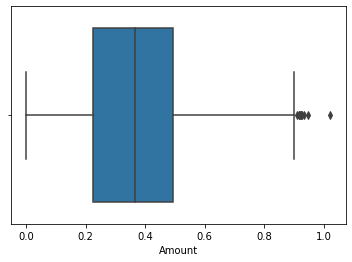

In [48]:
sns.boxplot(x='Amount',data=X_test)


### After applying the power transformation the data has become somewhat normal


## Model Building
- Build different models on the imbalanced dataset and see the result

### Check the variance bentween the features

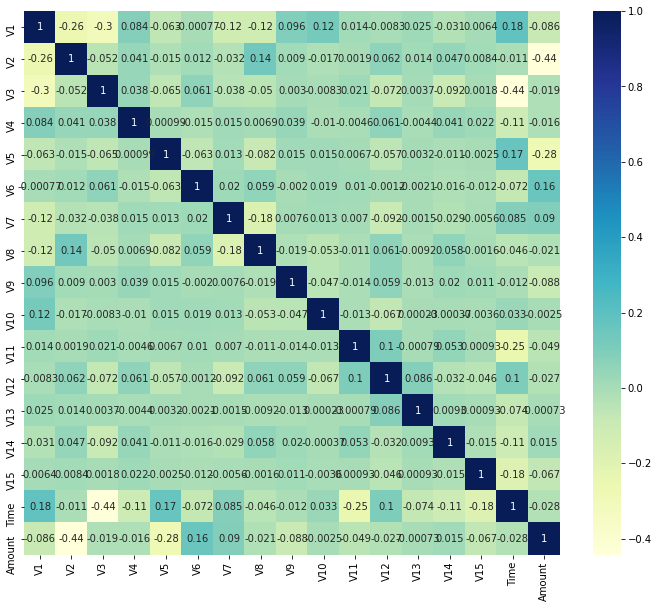

In [49]:
cor=X_train.corr()
round(cor,3)
plt.figure(figsize=(12,10))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

### As we know that there are 284315 legitimate transactions as compared to 492 fraudulent transactions 
### After splitting the data into train and test the train set contain 350 Class 1 rows
### So if use 5 folds, then in each fold there would be 70 class 1 data  and if we use 4 folds this value would be 87 and if we use 3 folds the value would be 117. So let's try all these values and compare the model accuracy

### n_folds=3

In [ ]:
# Logistic Regression
from sklearn import linear_model #import the package
logistic = LogisticRegression(class_weight='balanced')
# create pipeline
steps = [("logistic", logistic)]

# compile pipeline
log_PCA = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['10','l1', 'l2','13']}

# create 5 folds
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 100)

# create gridsearch object
model_3fold = GridSearchCV(estimator=log_PCA, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

#num_C = ______  #--> list of values
#cv_num =   #--> list of values

In [ ]:
# fit model
model_3fold.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   20.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=100, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight='balanced',
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                             

In [ ]:
# print best hyperparameters
print("Best AUC: ", model_3fold.best_score_)
print("Best hyperparameters: ", model_3fold.best_params_)

Best AUC:  0.9853625248395604
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2'}


### n_folds=4

In [ ]:
# Logistic Regression
from sklearn import linear_model #import the package
logistic = LogisticRegression(class_weight='balanced')
# create pipeline
steps = [("logistic", logistic)]

# compile pipeline
log_PCA = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['10','l1', 'l2','13']}

# create 4 folds
folds = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 100)

# create gridsearch object
model_4fold = GridSearchCV(estimator=log_PCA, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

#num_C = ______  #--> list of values
#cv_num =   #--> list of values

In [ ]:
# fit model
model_4fold.fit(X_train, y_train)

Fitting 4 folds for each of 32 candidates, totalling 128 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:   27.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=100, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight='balanced',
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                             

In [ ]:
# print best hyperparameters
print("Best AUC: ", model_4fold.best_score_)
print("Best hyperparameters: ", model_4fold.best_params_)

Best AUC:  0.9860123586319759
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2'}


In [ ]:
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

# create gridsearch object
model_5fold = GridSearchCV(estimator=log_PCA, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [ ]:
# fit model
model_5fold.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   32.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight='balanced',
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                             

In [ ]:
# print best hyperparameters
print("Best AUC: ", model_5fold.best_score_)
print("Best hyperparameters: ", model_5fold.best_params_)

Best AUC:  0.9857554966587626
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2'}


### As we can see the AUC for 3 fold was 98.53%, for 4 folds it's 98.60 and that for 5 folds is 98.58. So we can go ahead with 4 folds

In [ ]:
#perform cross validation

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters

### Let's calculate the optimum cutoff probability

In [ ]:
y_train_pred=model_4fold.predict_proba(X_train)
y_train_pred

array([[0.97888431, 0.02111569],
       [0.98710015, 0.01289985],
       [0.99638385, 0.00361615],
       ...,
       [0.84185768, 0.15814232],
       [0.94984595, 0.05015405],
       [0.91397676, 0.08602324]])

In [ ]:
### Create a temp dataframe having the columns for probability for '0' and '1'
y_train_pred = pd.DataFrame.from_records(y_train_pred)
y_train_pred=y_train_pred.rename(columns={0: 'prob_0',1:'prob_1'})
y_train_pred.head()

,prob_0,prob_1
0,0.978884,0.021116
1,0.987100,0.012900
2,0.996384,0.003616
3,0.946443,0.053557
4,0.970878,0.029122


In [ ]:
### Convert y_test to a data_frame and reset the index pr_id as a column
temp2=pd.DataFrame(y_train)
temp2= temp2.reset_index()
temp2.head()

,index,Class
0,7610,0
1,190214,0
2,130590,0
3,247916,0
4,55518,0


In [ ]:
### Add the columns of previous dataframe into y_train_pred
y_train_pred['index']=temp2['index']
y_train_pred['Class_actual']=temp2['Class']
y_train_pred.head()

,prob_0,prob_1,index,Class_actual
0,0.978884,0.021116,7610,0
1,0.987100,0.012900,190214,0
2,0.996384,0.003616,130590,0
3,0.946443,0.053557,247916,0
4,0.970878,0.029122,55518,0


### Let's create a dataframe having the predicted probablilies on different cutoffs ranging from 0.0,0.1,0.2 and so on to 1.0

In [ ]:
prob=[float(x/10) for x in range(10)]
for i in prob:
    y_train_pred[i]=y_train_pred.prob_1.map(lambda x: 1 if x>i else 0)
y_train_pred.head()

,prob_0,prob_1,index,Class_actual,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.978884,0.021116,7610,0,1,0,0,0,0,0,0,0,0,0
1,0.987100,0.012900,190214,0,1,0,0,0,0,0,0,0,0,0
2,0.996384,0.003616,130590,0,1,0,0,0,0,0,0,0,0,0
3,0.946443,0.053557,247916,0,1,0,0,0,0,0,0,0,0,0
4,0.970878,0.029122,55518,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = prob
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred.Class_actual, y_train_pred[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.001756,1.000000,0.000000
0.1,0.1,0.819952,0.980000,0.819671
0.2,0.2,0.913274,0.957143,0.913197
0.3,0.3,0.948055,0.937143,0.948074
0.4,0.4,0.966870,0.928571,0.966937
0.5,0.5,0.977343,0.922857,0.977439
0.6,0.6,0.983768,0.917143,0.983886
0.7,0.7,0.987831,0.914286,0.987961
0.8,0.8,0.991287,0.908571,0.991433
0.9,0.9,0.994994,0.880000,0.995196


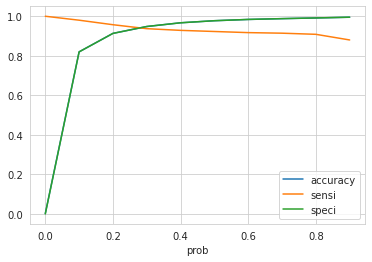

In [ ]:
sns.set_style('whitegrid')
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])

### Accuracy and Senstivity goes hand in hand and hence almost overlapping, hence only one of that is visble in graph
### Also from above graph we can see that the optimum cut-off value is 0.3
### Let's make the prediction with 0.3 probability and check the model accuracy

In [ ]:
temp=y_train_pred[['index','Class_actual','prob_1']]
temp['Class_predicted']=temp.prob_1.map(lambda x: 1 if x>0.3 else 0)
y_train_pred=temp
y_train_pred.head()

,index,Class_actual,prob_1,Class_predicted
0,7610,0,0.021116,0
1,190214,0,0.012900,0
2,130590,0,0.003616,0
3,247916,0,0.053557,0
4,55518,0,0.029122,0


In [ ]:
metrics.accuracy_score(y_train_pred.Class_actual,y_train_pred.Class_predicted)

0.9480548143095042

In [ ]:
#confusion Matrix
confusion_train=metrics.confusion_matrix(y_train_pred.Class_actual,y_train_pred.Class_predicted)
print(confusion_train)

[[188680  10334]
 [    22    328]]


### Let's calculate other metrics as well

In [ ]:
TP=confusion_train[1,1]
TN=confusion_train[0,0]
FP=confusion_train[0,1]
FN=confusion_train[1,0]
## Sestivity
print("Senstivity of the model is ",TP/float(TP+FN))
## Specifity
print("Specifity of the model is ",TN/float(TN+FP))
## Precision
print("Precision of the model is ",TP/float(TP+FP))
## Recall 
print("Recall of the model is ",TP/float(TP+FN))

Senstivity of the model is  0.9371428571428572
Specifity of the model is  0.9480740048438804
Precision of the model is  0.030763459013318326
Recall of the model is  0.9371428571428572


### As we can see the precision is 0.03% which means that my model predicts 0.03% frauds correctly out of the transactions it flagged as fraudelent transactions
### Which means out of the transactions it flagged as fraud 99.94% are actualy legitimate transactions and this model will cause a bad experience to the customers who did that transaction and will surely damage the Bank's reputation a big time

### On the other hand the recall is 93%, which means that it predict 93% percent of the fradulent transactions correctly
### Or in other words it was not able to identify only 7% of the fraudulent transactions. But these 7% transactions may be huge in amount and may cost the  bank huge sume of money. 

### Let's fit the model on test set as well and see how good it's performing on unseen data

In [ ]:
## Predict the y values
y_test_pred=model_4fold.predict_proba(X_test)
y_test_pred

array([[0.96527733, 0.03472267],
       [0.79455347, 0.20544653],
       [0.94519898, 0.05480102],
       ...,
       [0.96349576, 0.03650424],
       [0.95080389, 0.04919611],
       [0.99863201, 0.00136799]])

In [ ]:
y_test_pred = pd.DataFrame.from_records(y_test_pred)
y_test_pred=y_test_pred.rename(columns={0: 'prob_0',1:'prob_1'})
### Convert y_test to a data_frame and reset the index pr_id as a column
temp2=pd.DataFrame(y_test)
temp2= temp2.reset_index()
y_test_pred['index']=temp2['index']
y_test_pred['Class_actual']=temp2['Class']
temp=y_test_pred[['index','Class_actual','prob_1']]
temp['Class_predicted']=temp.prob_1.map(lambda x: 1 if x>0.3 else 0)
y_test_pred=temp
y_test_pred.head()


,index,Class_actual,prob_1,Class_predicted
0,49089,0,0.034723,0
1,154704,0,0.205447,0
2,67247,0,0.054801,0
3,251657,0,0.022524,0
4,201903,0,0.973868,1


In [ ]:
### Check the accuracy on test data
metrics.accuracy_score(y_test_pred.Class_actual,y_test_pred.Class_predicted)

0.9470992357478085

In [ ]:
#confusion Matrix
confusion_test=metrics.confusion_matrix(y_test_pred.Class_actual,y_test_pred.Class_predicted)
print(confusion_test)

[[80792  4509]
 [   11   131]]


In [ ]:
TP=confusion_test[1,1]
TN=confusion_test[0,0]
FP=confusion_test[0,1]
FN=confusion_test[1,0]
## Sestivity
print("Senstivity of the model is ",TP/float(TP+FN))
## Specifity
print("Specifity of the model is ",TN/float(TN+FP))
## Precision
print("Precision of the model is ",TP/float(TP+FP))
## Recall 
print("Recall of the model is ",TP/float(TP+FN))


Senstivity of the model is  0.9225352112676056
Specifity of the model is  0.947140127313865
Precision of the model is  0.028232758620689656
Recall of the model is  0.9225352112676056


### We can see that all the metrics are almost same as on train data set, so model was not an overfit. 

### So overall this is not a good model as 
- It's unnessary causing flags to lots of legitimate transactions and causing defamation and customer dissatisfaction to bank
- It let go significant number of fraudulent transactions to let go, which causing monetory loss to the bank

### Let's now try other models from binary classification family

### Decision Tree

### Let's start the hyper parameter tuning with 
- min_sample_split - The minimum number of samples required to split an internal node. Now as we have higly imbalanced data set (99.82% of class 0 and 0.17% of class1). As we will use the startified K-fold, which insures the smiliar ratio of the classes in each fold, so let's tune this from a range of (.03 to 0.14, which will intutively allows a range of 10 to 50 0 class samples in each leaf)

- min_samples_leaf - let's take this value range so that each leaf node have atleast one Class 1 sample and at max 100 Class 1 samples
so the range should be from .002 to 0.28

- max_depth - let's assume that the tree will grow symmetrically and will be balanced on both left and right side. Let's tune this value from 5 to 10

In [ ]:
from sklearn.tree import DecisionTreeClassifier
df_classifier = DecisionTreeClassifier(random_state=42)

params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [3,4, 5, 6],
             'min_samples_split': [0.03,0.05,0.07,0.09,0.11,0.13],
             'min_samples_leaf': [.002,.01,.05]}

folds = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 100)
gs_DT = GridSearchCV(estimator=df_classifier, 
                     param_grid=params_DT, 
                     cv=folds,
                     verbose=1, 
                     scoring='roc_auc',n_jobs=-1)

gs_DT.fit(X_train,y_train);

Fitting 4 folds for each of 144 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   50.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed: 16.6min finished


In [ ]:
### Find the best parameters
gs_DT.best_params_

In [ ]:
gs_DT.best_score_

0.9648010942532479

In [ ]:
### Make the predections on train
results_DT = pd.DataFrame(gs_DT.cv_results_['params'])
results_DT['test_score'] = gs_DT.cv_results_['mean_test_score']
results_DT

,criterion,max_depth,min_samples_leaf,min_samples_split,test_score
0,gini,3,0.002,0.03,0.926238
1,gini,3,0.002,0.05,0.926238
2,gini,3,0.002,0.07,0.926238
3,gini,3,0.002,0.09,0.926238
4,gini,3,0.002,0.11,0.926238
...,...,...,...,...,...
139,entropy,6,0.050,0.05,0.948208
140,entropy,6,0.050,0.07,0.948208
141,entropy,6,0.050,0.09,0.948208
142,entropy,6,0.050,0.11,0.948410


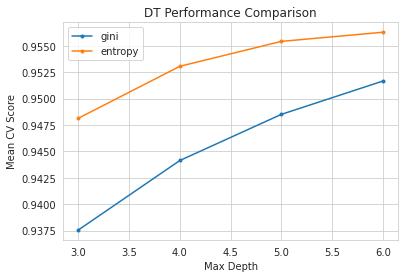

In [ ]:
for i in ['gini', 'entropy']:
    temp = results_DT[results_DT['criterion'] == i]
    temp_average = temp.groupby('max_depth').agg({'test_score': 'mean'})
    plt.plot(temp_average, marker = '.', label = i)
    
    
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel("Mean CV Score")
plt.title("DT Performance Comparison")
plt.show()

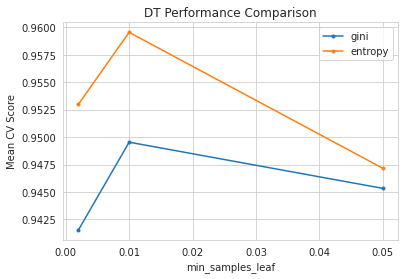

In [ ]:
for i in ['gini', 'entropy']:
    temp = results_DT[results_DT['criterion'] == i]
    temp_average = temp.groupby('min_samples_leaf').agg({'test_score': 'mean'})
    plt.plot(temp_average, marker = '.', label = i)
    
    
plt.legend()
plt.xlabel('min_samples_leaf')
plt.ylabel("Mean CV Score")
plt.title("DT Performance Comparison")
plt.show()

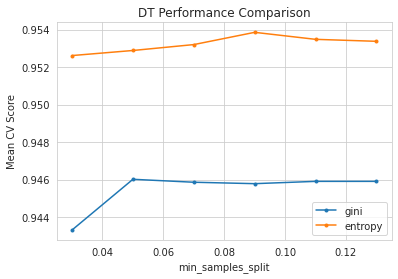

In [ ]:
for i in ['gini', 'entropy']:
    temp = results_DT[results_DT['criterion'] == i]
    temp_average = temp.groupby('min_samples_split').agg({'test_score': 'mean'})
    plt.plot(temp_average, marker = '.', label = i)
    
    
plt.legend()
plt.xlabel('min_samples_split')
plt.ylabel("Mean CV Score")
plt.title("DT Performance Comparison")
plt.show()

In [ ]:
y_train_pred_DT=gs_DT.predict_proba(X_train)
y_train_pred_DT = pd.DataFrame.from_records(y_train_pred_DT)
y_train_pred_DT=y_train_pred_DT.rename(columns={0: 'prob_0',1:'prob_1'})
### Convert y_test to a data_frame and reset the index pr_id as a column
temp2=pd.DataFrame(y_train)
temp2= temp2.reset_index()
y_train_pred_DT['index']=temp2['index']
y_train_pred_DT['Class_actual']=temp2['Class']
temp=y_train_pred_DT[['index','Class_actual','prob_1']]
y_train_pred.head()

,index,Class_actual,prob_1,Class_predicted
0,7610,0,0.021116,0
1,190214,0,0.012900,0
2,130590,0,0.003616,0
3,247916,0,0.053557,0
4,55518,0,0.029122,0


In [ ]:
prob=[float(x/10) for x in range(10)]
for i in prob:
    y_train_pred_DT[i]=y_train_pred_DT.prob_1.map(lambda x: 1 if x>i else 0)
y_train_pred_DT.head()

,prob_0,prob_1,index,Class_actual,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.999955,0.000045,7610,0,1,0,0,0,0,0,0,0,0,0
1,0.999955,0.000045,190214,0,1,0,0,0,0,0,0,0,0,0
2,0.999955,0.000045,130590,0,1,0,0,0,0,0,0,0,0,0
3,0.999735,0.000265,247916,0,1,0,0,0,0,0,0,0,0,0
4,0.999955,0.000045,55518,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion_DT[1,1] # true positive 
# TN = confusion_DT[0,0] # true negatives
# FP = confusion_DT[0,1] # false positives
# FN = confusion_DT[1,0] # false negatives

num = prob
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_DT.Class_actual, y_train_pred_DT[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.001756,1.000000,0.000000
0.1,0.1,0.991232,0.851429,0.991478
0.2,0.2,0.998244,0.000000,1.000000
0.3,0.3,0.998244,0.000000,1.000000
0.4,0.4,0.998244,0.000000,1.000000
0.5,0.5,0.998244,0.000000,1.000000
0.6,0.6,0.998244,0.000000,1.000000
0.7,0.7,0.998244,0.000000,1.000000
0.8,0.8,0.998244,0.000000,1.000000
0.9,0.9,0.998244,0.000000,1.000000


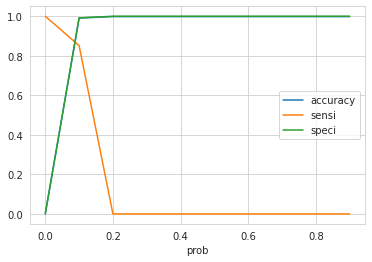

In [ ]:
sns.set_style('whitegrid')
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])

### From the above graph we can see that the optimum cut-off is 0.1
### Let'd make prediction on that cutoff

In [ ]:
temp=y_train_pred_DT[['index','Class_actual','prob_1']]
temp['Class_predicted']=temp.prob_1.map(lambda x: 1 if x>0.1 else 0)
y_train_pred_DT=temp
y_train_pred_DT.head()

,index,Class_actual,prob_1,Class_predicted
0,7610,0,0.000045,0
1,190214,0,0.000045,0
2,130590,0,0.000045,0
3,247916,0,0.000265,0
4,55518,0,0.000045,0


In [ ]:
metrics.accuracy_score(y_train_pred_DT.Class_actual,y_train_pred_DT.Class_predicted)

0.9912321181356715

In [ ]:
#confusion Matrix
confusion_train_DT=metrics.confusion_matrix(y_train_pred_DT.Class_actual,y_train_pred_DT.Class_predicted)
print(confusion_train_DT)

[[197318   1696]
 [    52    298]]


In [ ]:
TP=confusion_train_DT[1,1]
TN=confusion_train_DT[0,0]
FP=confusion_train_DT[0,1]
FN=confusion_train_DT[1,0]
## Sestivity
print("Senstivity of the model is ",TP/float(TP+FN))
## Specifity
print("Specifity of the model is ",TN/float(TN+FP))
## Precision
print("Precision of the model is ",TP/float(TP+FP))
## Recall 
print("Recall of the model is ",TP/float(TP+FN))

Senstivity of the model is  0.8514285714285714
Specifity of the model is  0.9914779864733134
Precision of the model is  0.14944834503510532
Recall of the model is  0.8514285714285714


### Make the predictions on test set similarly

In [ ]:
y_test_pred_DT=gs_DT.predict_proba(X_test)
y_test_pred_DT = pd.DataFrame.from_records(y_test_pred_DT)
y_test_pred_DT=y_test_pred_DT.rename(columns={0: 'prob_0',1:'prob_1'})
temp2=pd.DataFrame(y_test)
temp2= temp2.reset_index()
y_test_pred_DT['index']=temp2['index']
y_test_pred_DT['Class_actual']=temp2['Class']
y_test_pred_DT.head()
temp=y_test_pred_DT[['index','Class_actual','prob_1']]
temp['Class_predicted']=temp.prob_1.map(lambda x: 1 if x>0.1 else 0)
y_test_pred_DT=temp
y_test_pred_DT.head()

,index,Class_actual,prob_1,Class_predicted
0,49089,0,0.000045,0
1,154704,0,0.000045,0
2,67247,0,0.000551,0
3,251657,0,0.000045,0
4,201903,0,0.001779,0


In [ ]:
metrics.accuracy_score(y_test_pred_DT.Class_actual,y_test_pred_DT.Class_predicted)

0.9908008848003933

In [ ]:
#confusion Matrix
confusion_test_DT=metrics.confusion_matrix(y_test_pred_DT.Class_actual,y_test_pred_DT.Class_predicted)
print(confusion_test_DT)

[[84544   757]
 [   29   113]]


In [ ]:
TP=confusion_test_DT[1,1]
TN=confusion_test_DT[0,0]
FP=confusion_test_DT[0,1]
FN=confusion_test_DT[1,0]
## Sestivity
print("Senstivity of the model is ",TP/float(TP+FN))
## Specifity
print("Specifity of the model is ",TN/float(TN+FP))
## Precision
print("Precision of the model is ",TP/float(TP+FP))
## Recall 
print("Recall of the model is ",TP/float(TP+FN))

Senstivity of the model is  0.795774647887324
Specifity of the model is  0.9911255436630285
Precision of the model is  0.12988505747126436
Recall of the model is  0.795774647887324


### Below is the table showing the metrics of the models we build so far

### 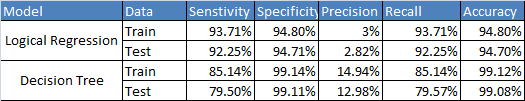

### From above table we can see that the models are surely not over-fitting as there is not much difference between the metrics of train and test data
### Decision tree is a better model as compared to logical regression model
### Precision has been increased to 3% to around 13%, similarly accuracy has also increased from around 94% to 99%, which is a significant improvement. 
### Recall has been reduced from around 92% to 80%, which is a drop, but that has gained on cost of precision and accuracy

### Now let's see if we can improve the performance using random forest

### Let's create a basic random forest model with 500 Trees 

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 500, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [ ]:
rf.base_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
# make predictions on test data
y_train_pred_rf = rf.predict(X_train)
temp=pd.DataFrame(y_train_pred_rf)
temp=temp.rename(columns={0: 'prob'})
temp2=pd.DataFrame(y_train)
temp2= temp2.reset_index()
temp['Class_actual']=temp2['Class']
y_train_pred_rf=temp
y_train_pred_rf.head()

,prob,Class_actual
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0


In [ ]:
prob=[float(x/10) for x in range(10)]
for i in prob:
    y_train_pred_rf[i]=y_train_pred_rf.prob.map(lambda x: 1 if x>i else 0)
y_train_pred_rf.head()

,prob,Class_actual,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = prob
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_rf.Class_actual, y_train_pred_rf[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.985805,1.000000,0.985780
0.1,0.1,0.999794,1.000000,0.999794
0.2,0.2,0.999900,1.000000,0.999900
0.3,0.3,0.999940,1.000000,0.999940
0.4,0.4,0.999995,1.000000,0.999995
0.5,0.5,1.000000,1.000000,1.000000
0.6,0.6,0.999985,0.991429,1.000000
0.7,0.7,0.999689,0.822857,1.000000
0.8,0.8,0.999639,0.794286,1.000000
0.9,0.9,0.999534,0.734286,1.000000


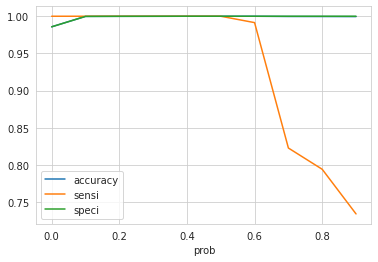

In [ ]:
sns.set_style('whitegrid')
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])

In [ ]:
temp=y_train_pred_rf[['Class_actual','prob']]
temp['Class_predicted']=temp.prob.map(lambda x: 1 if x>0.1 else 0)
y_train_pred_rf=temp
y_train_pred_rf.head()

,Class_actual,prob,Class_predicted
0,0,0.0,0
1,0,0.0,0
2,0,0.0,0
3,0,0.0,0
4,0,0.0,0


In [ ]:
### Check the accuracy of the random forest model
metrics.accuracy_score(y_train_pred_rf.Class_actual,y_train_pred_rf.Class_predicted)

0.9997943460203447

In [ ]:
#confusion Matrix
confusion_train_rf=metrics.confusion_matrix(y_train_pred_rf.Class_actual,y_train_pred_rf.Class_predicted)
print(confusion_train_rf)

[[198973     41]
 [     0    350]]


In [ ]:
TP=confusion_train_rf[1,1]
TN=confusion_train_rf[0,0]
FP=confusion_train_rf[0,1]
FN=confusion_train_rf[1,0]
## Sestivity
print("Senstivity of the model is ",TP/float(TP+FN))
## Specifity
print("Specifity of the model is ",TN/float(TN+FP))
## Precision
print("Precision of the model is ",TP/float(TP+FP))
## Recall 
print("Recall of the model is ",TP/float(TP+FN))

Senstivity of the model is  1.0
Specifity of the model is  0.9997939843428101
Precision of the model is  0.8951406649616368
Recall of the model is  1.0


### Let's make prediction on test as well

In [ ]:
# make predictions on test data
y_test_pred_rf = rf.predict(X_test)
temp=pd.DataFrame(y_test_pred_rf)
temp=temp.rename(columns={0: 'prob'})
temp2=pd.DataFrame(y_test)
temp2= temp2.reset_index()
temp['Class_actual']=temp2['Class']
y_test_pred_rf=temp
y_test_pred_rf.head()

,prob,Class_actual
0,0.000,0
1,0.000,0
2,0.000,0
3,0.000,0
4,0.012,0


In [ ]:
temp=y_test_pred_rf[['Class_actual','prob']]
temp['Class_predicted']=temp.prob.map(lambda x: 1 if x>0.1 else 0)
y_test_pred_rf=temp
y_test_pred_rf.head()

,Class_actual,prob,Class_predicted
0,0,0.000,0
1,0,0.000,0
2,0,0.000,0
3,0,0.000,0
4,0,0.012,0


In [ ]:
### Check the accuracy of the random forest model
metrics.accuracy_score(y_test_pred_rf.Class_actual,y_test_pred_rf.Class_predicted)

0.9986657771847899

In [ ]:
#confusion Matrix
confusion_test_rf=metrics.confusion_matrix(y_test_pred_rf.Class_actual,y_test_pred_rf.Class_predicted)
print(confusion_test_rf)

[[85213    88]
 [   26   116]]


In [ ]:
TP=confusion_test_rf[1,1]
TN=confusion_test_rf[0,0]
FP=confusion_test_rf[0,1]
FN=confusion_test_rf[1,0]
## Sestivity
print("Senstivity of the model is ",TP/float(TP+FN))
## Specifity
print("Specifity of the model is ",TN/float(TN+FP))
## Precision
print("Precision of the model is ",TP/float(TP+FP))
## Recall 
print("Recall of the model is ",TP/float(TP+FN))

Senstivity of the model is  0.8169014084507042
Specifity of the model is  0.9989683591048171
Precision of the model is  0.5686274509803921
Recall of the model is  0.8169014084507042


### Models metrics so far is below
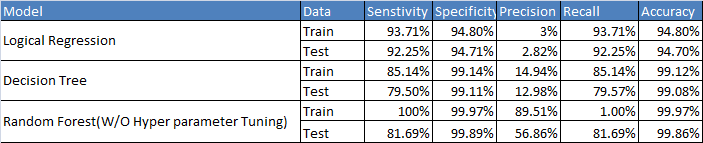

### SO far models we have created are keep on getting better with respect to variuos evaluation metrics
### Now let's try to tune the random forest further by tuning the hyper parameters 

### We will try to tune below hyper parameters
- n_estimators = number of trees in the foreset
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node
- bootstrap = method for sampling data points (with or without replacement)

### Let's try to find out the best parameters using Random Search Cross Validation

In [50]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [4]
# Minimum number of samples required to split a node
min_samples_split = [0.09]
# Minimum number of samples required at each leaf node
min_samples_leaf = [.01]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [10, 32, 55, 77, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [4], 'min_samples_split': [0.09], 'min_samples_leaf': [0.01]}


In [51]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter =10 , cv = 4, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 17.9min finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [52]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=0.01,
                      min_samples_split=0.09, min_weight_fraction_leaf=0.0,
                      n_estimators=55, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [53]:
y_train_pred_rf_M1=rf_random.predict(X_train)
len(y_train_pred_rf_M1)

199364

In [54]:
temp=pd.DataFrame(y_train_pred_rf_M1)
temp=temp.rename(columns={0: 'prob'})
temp2=pd.DataFrame(y_train)
temp2=temp2.reset_index()
temp['Class_actual']=temp2['Class']
y_train_pred_rf_M1=temp
y_train_pred_rf_M1.head()

,prob,Class_actual
0,0.006591,0
1,0.000140,0
2,0.000273,0
3,0.000207,0
4,0.000113,0


In [55]:
prob=[float(x/10) for x in range(10)]
for i in prob:
    y_train_pred_rf_M1[i]=y_train_pred_rf_M1.prob.map(lambda x: 1 if x>i else 0)
y_train_pred_rf_M1.head()

,prob,Class_actual,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.006591,0,1,0,0,0,0,0,0,0,0,0
1,0.000140,0,1,0,0,0,0,0,0,0,0,0
2,0.000273,0,1,0,0,0,0,0,0,0,0,0
3,0.000207,0,1,0,0,0,0,0,0,0,0,0
4,0.000113,0,1,0,0,0,0,0,0,0,0,0


In [56]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = prob
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_rf_M1.Class_actual, y_train_pred_rf_M1[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.001756,1.0,0.0
0.1,0.1,0.998244,0.0,1.0
0.2,0.2,0.998244,0.0,1.0
0.3,0.3,0.998244,0.0,1.0
0.4,0.4,0.998244,0.0,1.0
0.5,0.5,0.998244,0.0,1.0
0.6,0.6,0.998244,0.0,1.0
0.7,0.7,0.998244,0.0,1.0
0.8,0.8,0.998244,0.0,1.0
0.9,0.9,0.998244,0.0,1.0


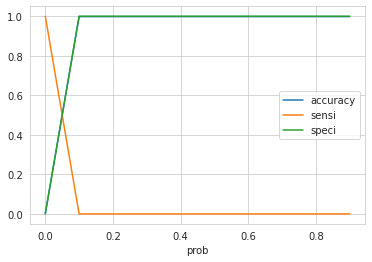

In [57]:
sns.set_style('whitegrid')
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])

In [58]:
temp=y_train_pred_rf_M1[['Class_actual','prob']]
temp['Class_predicted']=temp.prob.map(lambda x: 1 if x>0.05 else 0)
y_train_pred_rf_M1=temp
y_train_pred_rf_M1.head()

,Class_actual,prob,Class_predicted
0,0,0.006591,0
1,0,0.000140,0
2,0,0.000273,0
3,0,0.000207,0
4,0,0.000113,0


In [59]:
metrics.accuracy_score(y_train_pred_rf_M1.Class_actual,y_train_pred_rf_M1.Class_predicted)

0.99849521478301

In [60]:
#confusion Matrix
confusion_rf_M1_train=metrics.confusion_matrix(y_train_pred_rf_M1.Class_actual,y_train_pred_rf_M1.Class_predicted)
print(confusion_rf_M1_train)

[[198772    242]
 [    58    292]]


In [61]:
#confusion Matrix
confusion_rf_M1_train=metrics.confusion_matrix(y_train_pred_rf_M1.Class_actual,y_train_pred_rf_M1.Class_predicted)
print(confusion_rf_M1_train)

[[198772    242]
 [    58    292]]


In [62]:
### Other metrics on test
TP=confusion_rf_M1_train[1,1]
TN=confusion_rf_M1_train[0,0]
FP=confusion_rf_M1_train[0,1]
FN=confusion_rf_M1_train[1,0]
## Sestivity
print("Senstivity of the model is ",TP/float(TP+FN))
## Specifity
print("Specifity of the model is ",TN/float(TN+FP))
## Precision
print("Precision of the model is ",TP/float(TP+FP))
## Recall 
print("Recall of the model is ",TP/float(TP+FN))

Senstivity of the model is  0.8342857142857143
Specifity of the model is  0.9987840051453667
Precision of the model is  0.5468164794007491
Recall of the model is  0.8342857142857143


### Let's make predictions on test set as well

In [63]:
y_test_pred_rf_M1 = rf_random.predict(X_test)
temp=pd.DataFrame(y_test_pred_rf_M1)
temp=temp.rename(columns={0: 'prob'})
temp2=pd.DataFrame(y_test)
temp2= temp2.reset_index()
temp['Class_actual']=temp2['Class']
y_test_pred_rf_M1=temp
temp=y_test_pred_rf_M1[['Class_actual','prob']]
temp['Class_predicted']=temp.prob.map(lambda x: 1 if x>0.05 else 0)
y_test_pred_rf_M1=temp
y_test_pred_rf_M1.head()

,Class_actual,prob,Class_predicted
0,0,0.000131,0
1,0,0.000467,0
2,0,0.000180,0
3,0,0.000140,0
4,0,0.041091,0


In [64]:
confusion_rf_M1_test=metrics.confusion_matrix(y_test_pred_rf_M1.Class_actual,y_test_pred_rf_M1.Class_predicted)
print(confusion_rf_M1_test)

[[85164   137]
 [   27   115]]


In [65]:
metrics.accuracy_score(y_test_pred_rf_M1.Class_actual,y_test_pred_rf_M1.Class_predicted)

0.9980805917395222

In [66]:
TP=confusion_rf_M1_test[1,1]
TN=confusion_rf_M1_test[0,0]
FP=confusion_rf_M1_test[0,1]
FN=confusion_rf_M1_test[1,0]
## Sestivity
print("Senstivity of the model is ",TP/float(TP+FN))
## Specifity
print("Specifity of the model is ",TN/float(TN+FP))
## Precision
print("Precision of the model is ",TP/float(TP+FP))
## Recall 
print("Recall of the model is ",TP/float(TP+FN))

Senstivity of the model is  0.8098591549295775
Specifity of the model is  0.998393922697272
Precision of the model is  0.45634920634920634
Recall of the model is  0.8098591549295775


### Performance of models so far



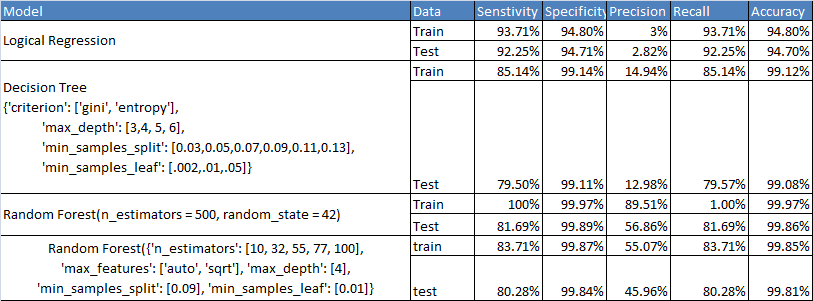


### Let's run the random forest model with n_estimators between 101 to 200(number of trees)

In [67]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 101, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [4]
# Minimum number of samples required to split a node
min_samples_split = [0.09]
# Minimum number of samples required at each leaf node
min_samples_leaf = [.01]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [101, 125, 150, 175, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [4], 'min_samples_split': [0.09], 'min_samples_leaf': [0.01]}


In [68]:
rf = RandomForestRegressor()
rf_random_100_200 = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter =10 , cv = 4, verbose=2, random_state=42, n_jobs = -1)
rf_random_100_200.fit(X_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 47.2min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 48.5min finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [69]:
### best params
rf_random_100_200.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=0.01,
                      min_samples_split=0.09, min_weight_fraction_leaf=0.0,
                      n_estimators=125, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [70]:
### Prediction on train
y_train_pred_rf_100_200=rf_random_100_200.predict(X_train)
temp=pd.DataFrame(y_train_pred_rf_100_200)
temp=temp.rename(columns={0: 'prob'})
temp2=pd.DataFrame(y_train)
temp2=temp2.reset_index()
temp['Class_actual']=temp2['Class']
y_train_pred_rf_100_200=temp
y_train_pred_rf_100_200.head()

,prob,Class_actual
0,0.011921,0
1,0.000123,0
2,0.000140,0
3,0.000209,0
4,0.000123,0


In [71]:
### get the cutoffs on different probabilities
prob=[float(x/10) for x in range(10)]
for i in prob:
    y_train_pred_rf_100_200[i]=y_train_pred_rf_100_200.prob.map(lambda x: 1 if x>i else 0)
y_train_pred_rf_100_200.head()

,prob,Class_actual,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.011921,0,1,0,0,0,0,0,0,0,0,0
1,0.000123,0,1,0,0,0,0,0,0,0,0,0
2,0.000140,0,1,0,0,0,0,0,0,0,0,0
3,0.000209,0,1,0,0,0,0,0,0,0,0,0
4,0.000123,0,1,0,0,0,0,0,0,0,0,0


In [72]:
### Create cutoff_df with different metrics on different probabilities

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = prob
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_rf_100_200.Class_actual, y_train_pred_rf_100_200[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.001756,1.0,0.0
0.1,0.1,0.998244,0.0,1.0
0.2,0.2,0.998244,0.0,1.0
0.3,0.3,0.998244,0.0,1.0
0.4,0.4,0.998244,0.0,1.0
0.5,0.5,0.998244,0.0,1.0
0.6,0.6,0.998244,0.0,1.0
0.7,0.7,0.998244,0.0,1.0
0.8,0.8,0.998244,0.0,1.0
0.9,0.9,0.998244,0.0,1.0


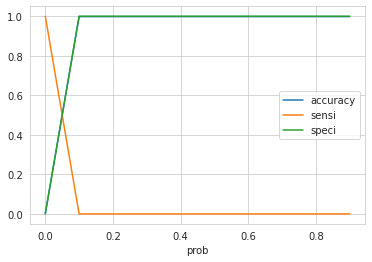

In [73]:
### plot the selectivity, senstivity and Specificity at different cutoffs

sns.set_style('whitegrid')
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])

In [74]:
### predit values on selected cutoff
temp=y_train_pred_rf_100_200[['Class_actual','prob']]
temp['Class_predicted']=temp.prob.map(lambda x: 1 if x>0.05 else 0)
y_train_pred_rf_100_200=temp
y_train_pred_rf_100_200.head()

,Class_actual,prob,Class_predicted
0,0,0.011921,0
1,0,0.000123,0
2,0,0.000140,0
3,0,0.000209,0
4,0,0.000123,0


In [75]:
### Accuracy
metrics.accuracy_score(y_train_pred_rf_100_200.Class_actual,y_train_pred_rf_100_200.Class_predicted)

0.9984550871772235

In [76]:
### Confusion matrix

#confusion Matrix
confusion_rf_rf_100_200_train=metrics.confusion_matrix(y_train_pred_rf_100_200.Class_actual,y_train_pred_rf_100_200.Class_predicted)
print(confusion_rf_rf_100_200_train)

[[198763    251]
 [    57    293]]


In [77]:
### Print Other metrics
TP=confusion_rf_rf_100_200_train[1,1]
TN=confusion_rf_rf_100_200_train[0,0]
FP=confusion_rf_rf_100_200_train[0,1]
FN=confusion_rf_rf_100_200_train[1,0]
## Sestivity
print("Senstivity of the model is ",TP/float(TP+FN))
## Specifity
print("Specifity of the model is ",TN/float(TN+FP))
## Precision
print("Precision of the model is ",TP/float(TP+FP))
## Recall 
print("Recall of the model is ",TP/float(TP+FN))


Senstivity of the model is  0.8371428571428572
Specifity of the model is  0.9987387821962274
Precision of the model is  0.5386029411764706
Recall of the model is  0.8371428571428572


In [78]:
### Predictions on test

y_test_pred_rf_100_200 = rf_random_100_200.predict(X_test)
temp=pd.DataFrame(y_test_pred_rf_100_200)
temp=temp.rename(columns={0: 'prob'})
temp2=pd.DataFrame(y_test)
temp2= temp2.reset_index()
temp['Class_actual']=temp2['Class']
y_test_pred_rf_100_200=temp
temp=y_test_pred_rf_100_200[['Class_actual','prob']]
temp['Class_predicted']=temp.prob.map(lambda x: 1 if x>0.05 else 0)
y_test_pred_rf_100_200=temp
y_test_pred_rf_100_200.head()

,Class_actual,prob,Class_predicted
0,0,0.000136,0
1,0,0.000391,0
2,0,0.000198,0
3,0,0.000124,0
4,0,0.034084,0


In [79]:
### test confusion metrics
confusion_rf_test_100_200=metrics.confusion_matrix(y_test_pred_rf_100_200.Class_actual,y_test_pred_rf_100_200.Class_predicted)
print(confusion_rf_test_100_200)

[[85157   144]
 [   28   114]]


In [80]:
### Other metrics on test
TP=confusion_rf_test_100_200[1,1]
TN=confusion_rf_test_100_200[0,0]
FP=confusion_rf_test_100_200[0,1]
FN=confusion_rf_test_100_200[1,0]
## Sestivity
print("Senstivity of the model is ",TP/float(TP+FN))
## Specifity
print("Specifity of the model is ",TN/float(TN+FP))
## Precision
print("Precision of the model is ",TP/float(TP+FP))
## Recall 
print("Recall of the model is ",TP/float(TP+FN))

Senstivity of the model is  0.8028169014084507
Specifity of the model is  0.998311860353337
Precision of the model is  0.4418604651162791
Recall of the model is  0.8028169014084507


In [81]:
### Accuracy
metrics.accuracy_score(y_test_pred_rf_100_200.Class_actual,y_test_pred_rf_100_200.Class_predicted)

0.9979869620682794

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 201, stop = 300, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [4]
# Minimum number of samples required to split a node
min_samples_split = [0.09]
# Minimum number of samples required at each leaf node
min_samples_leaf = [.01]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [201, 225, 250, 275, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [4], 'min_samples_split': [0.09], 'min_samples_leaf': [0.01]}


In [ ]:
rf = RandomForestRegressor()
rf_random_200_300 = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter =10 , cv = 4, verbose=2, random_state=42, n_jobs = -1)
rf_random_200_300.fit(X_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 60.4min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 61.8min finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random_200_300.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=0.01,
                      min_samples_split=0.09, min_weight_fraction_leaf=0.0,
                      n_estimators=275, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
### Prediction on train
y_train_pred_rf_200_300=rf_random_200_300.predict(X_train)
temp=pd.DataFrame(y_train_pred_rf_200_300)
temp=temp.rename(columns={0: 'prob'})
temp2=pd.DataFrame(y_train)
temp2=temp2.reset_index()
temp['Class_actual']=temp2['Class']
y_train_pred_rf_200_300=temp
y_train_pred_rf_200_300.head()

,prob,Class_actual
0,0.010283,0
1,0.000135,0
2,0.000191,0
3,0.000216,0
4,0.000130,0


In [ ]:
### get the cutoffs on different probabilities
prob=[float(x/10) for x in range(10)]
for i in prob:
    y_train_pred_rf_200_300[i]=y_train_pred_rf_200_300.prob.map(lambda x: 1 if x>i else 0)
y_train_pred_rf_200_300.head()

,prob,Class_actual,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.010283,0,1,0,0,0,0,0,0,0,0,0
1,0.000135,0,1,0,0,0,0,0,0,0,0,0
2,0.000191,0,1,0,0,0,0,0,0,0,0,0
3,0.000216,0,1,0,0,0,0,0,0,0,0,0
4,0.000130,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
### Create cutoff_df with different metrics on different probabilities

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = prob
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_rf_200_300.Class_actual, y_train_pred_rf_200_300[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df


,prob,accuracy,sensi,speci
0.0,0.0,0.001756,1.0,0.0
0.1,0.1,0.998244,0.0,1.0
0.2,0.2,0.998244,0.0,1.0
0.3,0.3,0.998244,0.0,1.0
0.4,0.4,0.998244,0.0,1.0
0.5,0.5,0.998244,0.0,1.0
0.6,0.6,0.998244,0.0,1.0
0.7,0.7,0.998244,0.0,1.0
0.8,0.8,0.998244,0.0,1.0
0.9,0.9,0.998244,0.0,1.0


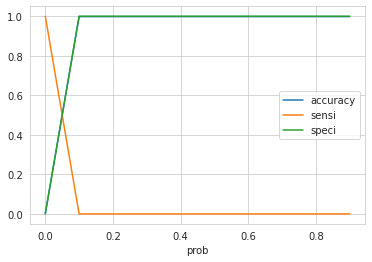

In [ ]:
### plot the selectivity, senstivity and Specificity at different cutoffs

sns.set_style('whitegrid')
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])

In [ ]:
### predit values on selected cutoff
temp=y_train_pred_rf_200_300[['Class_actual','prob']]
temp['Class_predicted']=temp.prob.map(lambda x: 1 if x>0.05 else 0)
y_train_pred_rf_200_300=temp
y_train_pred_rf_200_300.head()

,Class_actual,prob,Class_predicted
0,0,0.010283,0
1,0,0.000135,0
2,0,0.000191,0
3,0,0.000216,0
4,0,0.000130,0


In [ ]:
### Accuracy
metrics.accuracy_score(y_train_pred_rf_200_300.Class_actual,y_train_pred_rf_200_300.Class_predicted)

0.9993027828494613

In [ ]:
### Confusion matrix

#confusion Matrix
confusion_rf_200_300_train=metrics.confusion_matrix(y_train_pred_rf_200_300.Class_actual,y_train_pred_rf_200_300.Class_predicted)
print(confusion_rf_200_300_train)

[[198938     76]
 [    63    287]]


In [ ]:
### Print Other metrics
TP=confusion_rf_200_300_train[1,1]
TN=confusion_rf_200_300_train[0,0]
FP=confusion_rf_200_300_train[0,1]
FN=confusion_rf_200_300_train[1,0]
## Sestivity
print("Senstivity of the model is ",TP/float(TP+FN))
## Specifity
print("Specifity of the model is ",TN/float(TN+FP))
## Precision
print("Precision of the model is ",TP/float(TP+FP))
## Recall 
print("Recall of the model is ",TP/float(TP+FN))

Senstivity of the model is  0.82
Specifity of the model is  0.9996181173183796
Precision of the model is  0.790633608815427
Recall of the model is  0.82


In [ ]:
### Predictions on test

y_test_pred_rf_200_300 = rf_random_200_300.predict(X_test)
temp=pd.DataFrame(y_test_pred_rf_200_300)
temp=temp.rename(columns={0: 'prob'})
temp2=pd.DataFrame(y_test)
temp2= temp2.reset_index()
temp['Class_actual']=temp2['Class']
y_test_pred_rf_200_300=temp
temp=y_test_pred_rf_200_300[['Class_actual','prob']]
temp['Class_predicted']=temp.prob.map(lambda x: 1 if x>0.05 else 0)
y_test_pred_rf_200_300=temp
y_test_pred_rf_200_300.head()

,Class_actual,prob,Class_predicted
0,0,0.000144,0
1,0,0.000475,0
2,0,0.000159,0
3,0,0.000149,0
4,0,0.030370,0


In [ ]:
### test confusion metrics
confusion_rf_test_200_300=metrics.confusion_matrix(y_test_pred_rf_200_300.Class_actual,y_test_pred_rf_200_300.Class_predicted)
print(confusion_rf_test_200_300)

[[85254    47]
 [   33   109]]


In [ ]:
### Accuracy on test
metrics.accuracy_score(y_test_pred_rf_200_300.Class_actual,y_test_pred_rf_200_300.Class_predicted)

0.9990637032875719

In [ ]:
### Other metrics on test
TP=confusion_rf_test_200_300[1,1]
TN=confusion_rf_test_200_300[0,0]
FP=confusion_rf_test_200_300[0,1]
FN=confusion_rf_test_200_300[1,0]
## Sestivity
print("Senstivity of the model is ",TP/float(TP+FN))
## Specifity
print("Specifity of the model is ",TN/float(TN+FP))
## Precision
print("Precision of the model is ",TP/float(TP+FP))
## Recall 
print("Recall of the model is ",TP/float(TP+FN))

Senstivity of the model is  0.7676056338028169
Specifity of the model is  0.9994490099764364
Precision of the model is  0.6987179487179487
Recall of the model is  0.7676056338028169


#### Let's now build Model with trees in range of 300-400

In [82]:
### Hyper Parameters

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 301, stop = 400, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [4]
# Minimum number of samples required to split a node
min_samples_split = [0.09]
# Minimum number of samples required at each leaf node
min_samples_leaf = [.01]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [301, 325, 350, 375, 400], 'max_features': ['auto', 'sqrt'], 'max_depth': [4], 'min_samples_split': [0.09], 'min_samples_leaf': [0.01]}


In [83]:
### Modeling
rf = RandomForestRegressor()
rf_random_300_400 = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter =10 , cv = 4, verbose=2, random_state=42, n_jobs = -1)
rf_random_300_400.fit(X_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 111.4min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 114.1min finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [89]:
### best params
rf_random_300_400.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=0.01,
                      min_samples_split=0.09, min_weight_fraction_leaf=0.0,
                      n_estimators=375, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [90]:
### Prediction on train
y_train_pred_rf_300_400=rf_random_300_400.predict(X_train)
temp=pd.DataFrame(y_train_pred_rf_300_400)
temp=temp.rename(columns={0: 'prob'})
temp2=pd.DataFrame(y_train)
temp2=temp2.reset_index()
temp['Class_actual']=temp2['Class']
y_train_pred_rf_300_400=temp
y_train_pred_rf_300_400.head()

,prob,Class_actual
0,0.008576,0
1,0.000135,0
2,0.000224,0
3,0.000193,0
4,0.000125,0


In [91]:
### get the cutoffs on different probabilities
prob=[float(x/10) for x in range(10)]
for i in prob:
    y_train_pred_rf_300_400[i]=y_train_pred_rf_300_400.prob.map(lambda x: 1 if x>i else 0)
y_train_pred_rf_300_400.head()

,prob,Class_actual,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.008576,0,1,0,0,0,0,0,0,0,0,0
1,0.000135,0,1,0,0,0,0,0,0,0,0,0
2,0.000224,0,1,0,0,0,0,0,0,0,0,0
3,0.000193,0,1,0,0,0,0,0,0,0,0,0
4,0.000125,0,1,0,0,0,0,0,0,0,0,0


In [92]:
### Create cutoff_df with different metrics on different probabilities

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = prob
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_rf_300_400.Class_actual, y_train_pred_rf_300_400[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.001756,1.0,0.0
0.1,0.1,0.998244,0.0,1.0
0.2,0.2,0.998244,0.0,1.0
0.3,0.3,0.998244,0.0,1.0
0.4,0.4,0.998244,0.0,1.0
0.5,0.5,0.998244,0.0,1.0
0.6,0.6,0.998244,0.0,1.0
0.7,0.7,0.998244,0.0,1.0
0.8,0.8,0.998244,0.0,1.0
0.9,0.9,0.998244,0.0,1.0


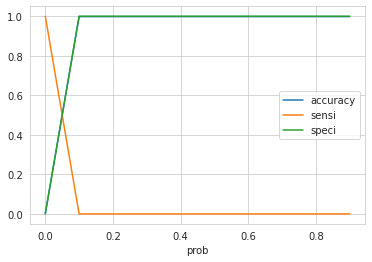

In [93]:
### plot the selectivity, senstivity and Specificity at different cutoffs
sns.set_style('whitegrid')
#sns.set_context( rc={"lines.linewidth": 0.01})
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])

In [94]:
### predit values on selected cutoff
temp=y_train_pred_rf_300_400[['Class_actual','prob']]
temp['Class_predicted']=temp.prob.map(lambda x: 1 if x>0.05 else 0)
y_train_pred_rf_300_400=temp
y_train_pred_rf_300_400.head()

,Class_actual,prob,Class_predicted
0,0,0.008576,0
1,0,0.000135,0
2,0,0.000224,0
3,0,0.000193,0
4,0,0.000125,0


In [95]:
### Accuracy
metrics.accuracy_score(y_train_pred_rf_300_400.Class_actual,y_train_pred_rf_300_400.Class_predicted)

0.9993027828494613

In [96]:
### Confusion matrix

#confusion Matrix
confusion_rf_300_400_train=metrics.confusion_matrix(y_train_pred_rf_300_400.Class_actual,y_train_pred_rf_300_400.Class_predicted)
print(confusion_rf_300_400_train)

[[198938     76]
 [    63    287]]


In [97]:
### Print Other metrics
TP=confusion_rf_300_400_train[1,1]
TN=confusion_rf_300_400_train[0,0]
FP=confusion_rf_300_400_train[0,1]
FN=confusion_rf_300_400_train[1,0]
## Sestivity
print("Senstivity of the model is ",TP/float(TP+FN))
## Specifity
print("Specifity of the model is ",TN/float(TN+FP))
## Precision
print("Precision of the model is ",TP/float(TP+FP))
## Recall 
print("Recall of the model is ",TP/float(TP+FN))

Senstivity of the model is  0.82
Specifity of the model is  0.9996181173183796
Precision of the model is  0.790633608815427
Recall of the model is  0.82


In [98]:
### Predictions on test

y_test_pred_rf_300_400 = rf_random_300_400.predict(X_test)
temp=pd.DataFrame(y_test_pred_rf_300_400)
temp=temp.rename(columns={0: 'prob'})
temp2=pd.DataFrame(y_test)
temp2= temp2.reset_index()
temp['Class_actual']=temp2['Class']
y_test_pred_rf_300_400=temp
temp=y_test_pred_rf_300_400[['Class_actual','prob']]
temp['Class_predicted']=temp.prob.map(lambda x: 1 if x>0.05 else 0)
y_test_pred_rf_300_400=temp
y_test_pred_rf_300_400.head()

,Class_actual,prob,Class_predicted
0,0,0.000135,0
1,0,0.000676,0
2,0,0.000173,0
3,0,0.000134,0
4,0,0.034094,0


In [99]:
### test confusion metrics
confusion_rf_test_300_400=metrics.confusion_matrix(y_test_pred_rf_300_400.Class_actual,y_test_pred_rf_300_400.Class_predicted)
print(confusion_rf_test_300_400)

[[85253    48]
 [   32   110]]


In [100]:
### Accuracy on test
metrics.accuracy_score(y_test_pred_rf_300_400.Class_actual,y_test_pred_rf_300_400.Class_predicted)

0.9990637032875719

In [101]:
### Other metrics on test
TP=confusion_rf_test_300_400[1,1]
TN=confusion_rf_test_300_400[0,0]
FP=confusion_rf_test_300_400[0,1]
FN=confusion_rf_test_300_400[1,0]
## Sestivity
print("Senstivity of the model is ",TP/float(TP+FN))
## Specifity
print("Specifity of the model is ",TN/float(TN+FP))
## Precision
print("Precision of the model is ",TP/float(TP+FP))
## Recall 
print("Recall of the model is ",TP/float(TP+FN))

Senstivity of the model is  0.7746478873239436
Specifity of the model is  0.9994372867844457
Precision of the model is  0.6962025316455697
Recall of the model is  0.7746478873239436


In [ ]:
### Hyper Parameters

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 401, stop = 500, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [4]
# Minimum number of samples required to split a node
min_samples_split = [0.09]
# Minimum number of samples required at each leaf node
min_samples_leaf = [.01]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [401, 425, 450, 475, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [4], 'min_samples_split': [0.09], 'min_samples_leaf': [0.01]}


In [ ]:
### Modeling
rf = RandomForestRegressor()
rf_random_400_500 = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter =10 , cv = 4, verbose=2, random_state=42, n_jobs = -1)
rf_random_400_500.fit(X_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 107.6min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 110.1min finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
### best params
rf_random_400_500.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=0.01,
                      min_samples_split=0.09, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
### Prediction on train
y_train_pred_rf_400_500=rf_random_400_500.predict(X_train)
temp=pd.DataFrame(y_train_pred_rf_400_500)
temp=temp.rename(columns={0: 'prob'})
temp2=pd.DataFrame(y_train)
temp2=temp2.reset_index()
temp['Class_actual']=temp2['Class']
y_train_pred_rf_400_500=temp
y_train_pred_rf_400_500.head()

,prob,Class_actual
0,0.012191,0
1,0.000135,0
2,0.000209,0
3,0.000215,0
4,0.000126,0


In [ ]:
### get the cutoffs on different probabilities
prob=[float(x/10) for x in range(10)]
for i in prob:
    y_train_pred_rf_400_500[i]=y_train_pred_rf_400_500.prob.map(lambda x: 1 if x>i else 0)
y_train_pred_rf_400_500.head()

,prob,Class_actual,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.012191,0,1,0,0,0,0,0,0,0,0,0
1,0.000135,0,1,0,0,0,0,0,0,0,0,0
2,0.000209,0,1,0,0,0,0,0,0,0,0,0
3,0.000215,0,1,0,0,0,0,0,0,0,0,0
4,0.000126,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
### Create cutoff_df with different metrics on different probabilities

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = prob
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_rf_400_500.Class_actual, y_train_pred_rf_400_500[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df


,prob,accuracy,sensi,speci
0.0,0.0,0.001756,1.0,0.0
0.1,0.1,0.998244,0.0,1.0
0.2,0.2,0.998244,0.0,1.0
0.3,0.3,0.998244,0.0,1.0
0.4,0.4,0.998244,0.0,1.0
0.5,0.5,0.998244,0.0,1.0
0.6,0.6,0.998244,0.0,1.0
0.7,0.7,0.998244,0.0,1.0
0.8,0.8,0.998244,0.0,1.0
0.9,0.9,0.998244,0.0,1.0


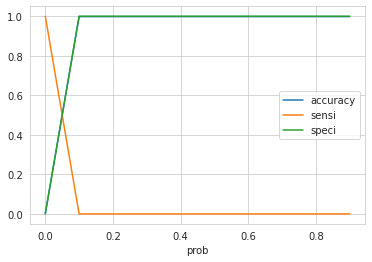

In [ ]:
### plot the selectivity, senstivity and Specificity at different cutoffs

sns.set_style('whitegrid')
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])

In [ ]:
### predit values on selected cutoff
temp=y_train_pred_rf_400_500[['Class_actual','prob']]
temp['Class_predicted']=temp.prob.map(lambda x: 1 if x>0.05 else 0)
y_train_pred_rf_400_500=temp
y_train_pred_rf_400_500.head()

,Class_actual,prob,Class_predicted
0,0,0.012191,0
1,0,0.000135,0
2,0,0.000209,0
3,0,0.000215,0
4,0,0.000126,0


In [ ]:
### Accuracy
metrics.accuracy_score(y_train_pred_rf_400_500.Class_actual,y_train_pred_rf_400_500.Class_predicted)

0.999297766898738

In [ ]:
confusion_rf_400_500_train=metrics.confusion_matrix(y_train_pred_rf_400_500.Class_actual,y_train_pred_rf_400_500.Class_predicted)
print(confusion_rf_400_500_train)


[[198938     76]
 [    64    286]]


In [ ]:
### Print Other metrics
TP=confusion_rf_400_500_train[1,1]
TN=confusion_rf_400_500_train[0,0]
FP=confusion_rf_400_500_train[0,1]
FN=confusion_rf_400_500_train[1,0]
## Sestivity
print("Senstivity of the model is ",TP/float(TP+FN))
## Specifity
print("Specifity of the model is ",TN/float(TN+FP))
## Precision
print("Precision of the model is ",TP/float(TP+FP))
## Recall 
print("Recall of the model is ",TP/float(TP+FN))

Senstivity of the model is  0.8171428571428572
Specifity of the model is  0.9996181173183796
Precision of the model is  0.7900552486187845
Recall of the model is  0.8171428571428572


In [ ]:
### Predictions on test

y_test_pred_rf_400_500 = rf_random_400_500.predict(X_test)
temp=pd.DataFrame(y_test_pred_rf_400_500)
temp=temp.rename(columns={0: 'prob'})
temp2=pd.DataFrame(y_test)
temp2= temp2.reset_index()
temp['Class_actual']=temp2['Class']
y_test_pred_rf_400_500=temp
temp=y_test_pred_rf_400_500[['Class_actual','prob']]
temp['Class_predicted']=temp.prob.map(lambda x: 1 if x>0.05 else 0)
y_test_pred_rf_400_500=temp
y_test_pred_rf_400_500.head()

,Class_actual,prob,Class_predicted
0,0,0.000135,0
1,0,0.000435,0
2,0,0.000167,0
3,0,0.000135,0
4,0,0.031347,0


In [ ]:
### test confusion metrics
confusion_rf_test_400_500=metrics.confusion_matrix(y_test_pred_rf_400_500.Class_actual,y_test_pred_rf_400_500.Class_predicted)
print(confusion_rf_test_400_500)

[[85255    46]
 [   33   109]]


In [ ]:
### Accuracy on test
metrics.accuracy_score(y_test_pred_rf_400_500.Class_actual,y_test_pred_rf_400_500.Class_predicted)

0.9990754069964772

In [106]:
### Other metrics on test
TP=confusion_rf_test_400_500[1,1]
TN=confusion_rf_test_400_500[0,0]
FP=confusion_rf_test_400_500[0,1]
FN=confusion_rf_test_400_500[1,0]
## Sestivity
print("Senstivity of the model is ",TP/float(TP+FN))
## Specifity
print("Specifity of the model is ",TN/float(TN+FP))
## Precision
print("Precision of the model is ",TP/float(TP+FP))
## Recall 
print("Recall of the model is ",TP/float(TP+FN))

Senstivity of the model is  0.7676056338028169
Specifity of the model is  0.9994605434438437
Precision of the model is  0.7032258064516129
Recall of the model is  0.7676056338028169


### Now let's create a random forest with 100 trees(300-400) but this time with GridDsearchCV

In [107]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [3,4, 5],
    'max_features': ['sqrt'],
    'min_samples_leaf': [.01,.05,.07,],
    'min_samples_split': [0.05,0.07,0.09],
    'n_estimators': [301,325,350,375,400],
    'warm_start': [True]
}
# Create a based model
rf = RandomForestRegressor()# Instantiate the grid search model
rf_gs_300_400_M1 = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 4, n_jobs = -1, verbose=2)
print (param_grid)

{'bootstrap': [True], 'max_depth': [3, 4, 5], 'max_features': ['sqrt'], 'min_samples_leaf': [0.01, 0.05, 0.07], 'min_samples_split': [0.05, 0.07, 0.09], 'n_estimators': [301, 325, 350, 375, 400], 'warm_start': [True]}


In [108]:
rf_gs_300_400_M1.fit(X_train,y_train)

Fitting 4 folds for each of 135 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 35.5min


KeyboardInterrupt: ignored

In [ ]:
### best params
rf_gs_300_400_M1.best_estimator_

In [ ]:
### Prediction on train
y_train_pred_gs_300_400_M1=rf_gs_300_400_M1.predict(X_train)
temp=pd.DataFrame(y_train_pred_gs_300_400_M1)
temp=temp.rename(columns={0: 'prob'})
temp2=pd.DataFrame(y_train)
temp2=temp2.reset_index()
temp['Class_actual']=temp2['Class']
y_train_pred_gs_300_400_M1=temp
y_train_pred_gs_300_400_M1.head()

In [ ]:
### get the cutoffs on different probabilities
prob=[float(x/10) for x in range(10)]
for i in prob:
    y_train_pred_gs_300_400_M1[i]=y_train_pred_gs_300_400_M1.prob.map(lambda x: 1 if x>i else 0)
y_train_pred_gs_300_400_M1.head()

In [ ]:
### Create cutoff_df with different metrics on different probabilities

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = prob
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_gs_300_400_M1.Class_actual, y_train_pred_gs_300_400_M1[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

In [ ]:
### plot the selectivity, senstivity and Specificity at different cutoffs

sns.set_style('whitegrid')
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])

In [ ]:
### predict values on selected cutoff
temp=y_train_pred_gs_300_400_M1[['Class_actual','prob']]
temp['Class_predicted']=temp.prob.map(lambda x: 1 if x>0.05 else 0)
y_train_pred_gs_300_400_M1=temp
y_train_pred_gs_300_400_M1.head()

In [109]:
### Accuracy
metrics.accuracy_score(y_train_pred_gs_300_400_M1.Class_actual,y_train_pred_gs_300_400_M1.Class_predicted)

0.9993278626030778


In [110]:
### Confusion matrix

#confusion Matrix
#confusion_gs_300_400_M1_train=metrics.confusion_matrix(y_train_pred_gs_300_400_M1.Class_actual,y_train_pred_gs_300_400_M1.Class_predicted)
print(confusion_gs_300_400_M1_train)

[[198945     69]
 [    65    285]]


In [111]:
### Print Other metrics
TP=confusion_gs_300_400_M1_train[1,1]
TN=confusion_gs_300_400_M1_train[0,0]
FP=confusion_gs_300_400_M1_train[0,1]
FN=confusion_gs_300_400_M1_train[1,0]
## Sestivity
print("Senstivity of the model is ",TP/float(TP+FN))
## Specifity
print("Specifity of the model is ",TN/float(TN+FP))
## Precision
print("Precision of the model is ",TP/float(TP+FP))
## Recall 
print("Recall of the model is ",TP/float(TP+FN))

Senstivity of the model is  0.8142857142857143
Specifity of the model is  0.9996532907232657
Precision of the model is  0.8050847457627118
Recall of the model is  0.8142857142857143


In [ ]:
### Predictions on test

y_test_pred_gs_300_400_M1 = rf_gs_300_400_M1.predict(X_test)
temp=pd.DataFrame(y_test_pred_gs_300_400_M1)
temp=temp.rename(columns={0: 'prob'})
temp2=pd.DataFrame(y_test)
temp2= temp2.reset_index()
temp['Class_actual']=temp2['Class']
y_test_pred_gs_300_400_M1=temp
temp=y_test_pred_gs_300_400_M1[['Class_actual','prob']]
temp['Class_predicted']=temp.prob.map(lambda x: 1 if x>0.05 else 0)
y_test_pred_gs_300_400_M1=temp

In [112]:
### test confusion metrics
confusion_gs_test_300_400_M1=metrics.confusion_matrix(y_test_pred_gs_300_400_M1.Class_actual,y_test_pred_gs_300_400_M1.Class_predicted)
print(confusion_gs_test_300_400_M1)


[[85259    42]
 [   35   107]]


In [113]:
### Accuracy on test
metrics.accuracy_score(y_test_pred_gs_300_400_M1.Class_actual,y_test_pred_gs_300_400_M1.Class_predicted)

0.9990988144142879


In [114]:
### Other metrics on test
TP=confusion_gs_test_300_400_M1[1,1]
TN=confusion_gs_test_300_400_M1[0,0]
FP=confusion_gs_test_300_400_M1[0,1]
FN=confusion_gs_test_300_400_M1[1,0]
## Sestivity
print("Senstivity of the model is ",TP/float(TP+FN))
## Specifity
print("Specifity of the model is ",TN/float(TN+FP))
## Precision
print("Precision of the model is ",TP/float(TP+FP))
## Recall 
print("Recall of the model is ",TP/float(TP+FN))

Senstivity of the model is  0.7535211267605634
Specifity of the model is  0.99950762593639
Precision of the model is  0.7181208053691275
Recall of the model is  0.7535211267605634


## Model building with balancing Classes

##### Perform class balancing with :
- SMOTE
- ADASYN

In [ ]:
### import the imblearn module
import imblearn as imb

## Model Building
- Build different models on the balanced dataset and see the result

## Logistic Regression with SMOTE

In [117]:
# Logistic Regression
from sklearn import linear_model #import the package


In [118]:
from imblearn import over_sampling #- import the packages

#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


### Print the class distribution after applying SMOTE 

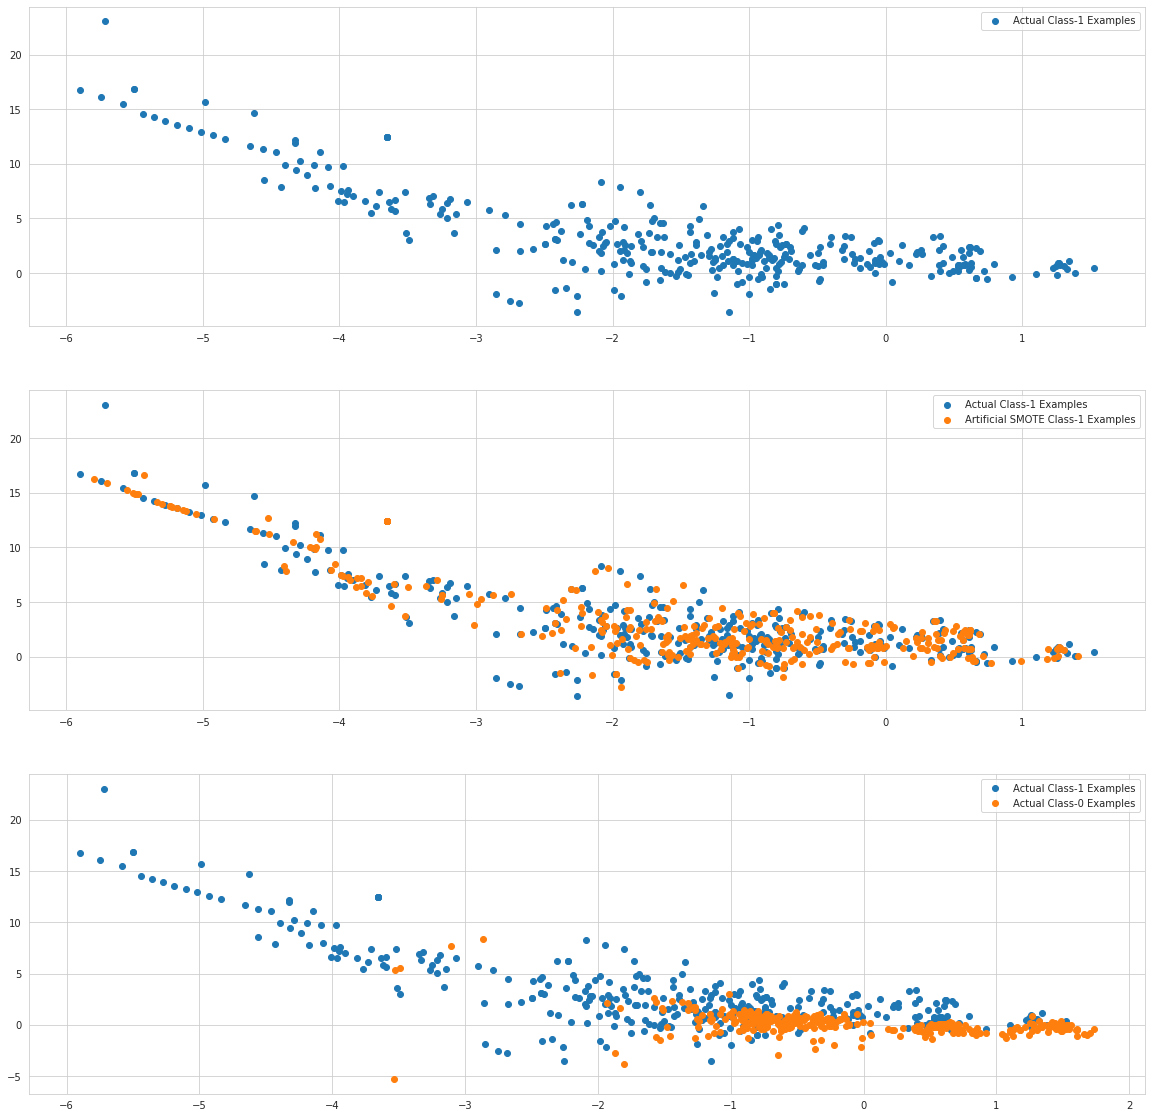

In [119]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

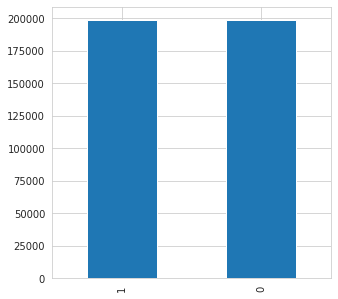

In [120]:
y_train_smote=pd.DataFrame(y_train_smote)
y_train_smote.columns=['Class']
plt.rcParams['figure.figsize'] = [5,5]
fig = plt.figure()
y_train_smote.Class.value_counts().plot(kind='bar')

In [121]:
X_train_smote=pd.DataFrame(X_train_smote)
X_train_smote.columns=['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','Time','Amount']
X_train_smote.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,Time,Amount
0,0.598470,-0.076635,0.414364,0.017924,-0.150960,0.345395,-0.423005,0.053042,1.152344,-0.468132,2.711653,-1.044975,2.490859,1.988839,0.192412,-1.977762,0.028823
1,1.445565,-0.134373,-0.902690,0.208193,0.136115,-0.409005,0.073299,-0.252318,0.277355,0.257359,0.627815,1.546125,0.529601,0.317871,-0.765034,0.730062,0.101955
2,0.843049,-0.987411,-0.652970,-1.919788,0.423178,2.278265,-1.478071,0.853644,-1.629738,1.315947,-0.265160,-1.117650,0.627704,-0.502524,1.139137,-0.254749,0.489030
3,-0.326321,0.805913,-0.366669,-0.296532,0.512231,-0.805682,0.794658,-0.185940,0.130993,-0.479100,-0.135555,0.007221,0.121092,-1.148253,-0.307278,1.193842,0.078670
4,0.566536,-0.144094,0.637616,0.445581,-0.564414,0.053504,-0.482081,0.184401,0.269297,0.107031,1.543871,0.577842,-0.847218,0.455308,1.052225,-0.980315,0.233388


### Now let's perform the logistic regression on this balanced data

In [122]:
logistic = LogisticRegression(class_weight='balanced')
# create pipeline
steps = [("logistic", logistic)]

# compile pipeline
log = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['10','l1', 'l2','13']}

# create 4 folds
folds = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 100)

# create gridsearch object
log_bl = GridSearchCV(estimator=log, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

#num_C = ______  #--> list of values
#cv_num =   #--> list of values

In [123]:
log_bl.fit(X_train_smote,y_train_smote)

Fitting 4 folds for each of 32 candidates, totalling 128 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:   55.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=100, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight='balanced',
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                             

In [124]:
log_bl.best_estimator_

Pipeline(memory=None,
         steps=[('logistic',
                 LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [ ]:
y_train_smote_pred=log_bl.predict_proba(X_train_smote)
y_train_smote_pred

array([[9.86918607e-01, 1.30813928e-02],
       [9.90645096e-01, 9.35490440e-03],
       [9.96727218e-01, 3.27278204e-03],
       ...,
       [3.40590822e-09, 9.99999997e-01],
       [4.81317251e-04, 9.99518683e-01],
       [5.78791859e-09, 9.99999994e-01]])

In [ ]:
### Create a temp dataframe having the columns for probability for '0' and '1'
y_train_smote_pred = pd.DataFrame.from_records(y_train_smote_pred)
y_train_smote_pred=y_train_smote_pred.rename(columns={0: 'prob_0',1:'prob_1'})
y_train_smote_pred.head()

,prob_0,prob_1
0,0.986919,0.013081
1,0.990645,0.009355
2,0.996727,0.003273
3,0.953034,0.046966
4,0.974764,0.025236


In [ ]:
### Convert y_test_smote to a data_frame and reset the index pr_id as a column
temp2=pd.DataFrame(y_train_smote)
temp2= temp2.reset_index()
temp2.head()

,index,Class
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [ ]:
### Add the columns of previous dataframe into y_train_smote_pred
y_train_smote_pred['index']=temp2['index']
y_train_smote_pred['Class_actual']=temp2['Class']
y_train_smote_pred.head()

,prob_0,prob_1,index,Class_actual
0,0.986919,0.013081,0,0
1,0.990645,0.009355,1,0
2,0.996727,0.003273,2,0
3,0.953034,0.046966,3,0
4,0.974764,0.025236,4,0


In [ ]:

prob=[float(x/10) for x in range(10)]
for i in prob:
    y_train_smote_pred[i]=y_train_smote_pred.prob_1.map(lambda x: 1 if x>i else 0)
y_train_smote_pred.head()

,prob_0,prob_1,index,Class_actual,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.986919,0.013081,0,0,1,0,0,0,0,0,0,0,0,0
1,0.990645,0.009355,1,0,1,0,0,0,0,0,0,0,0,0
2,0.996727,0.003273,2,0,1,0,0,0,0,0,0,0,0,0
3,0.953034,0.046966,3,0,1,0,0,0,0,0,0,0,0,0
4,0.974764,0.025236,4,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = prob
for i in num:
    cm1 = metrics.confusion_matrix(y_train_smote_pred.Class_actual, y_train_smote_pred[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.500000,1.000000,0.000000
0.1,0.1,0.904796,0.986775,0.822816
0.2,0.2,0.937688,0.961611,0.913765
0.3,0.3,0.945642,0.942718,0.948566
0.4,0.4,0.948875,0.930769,0.966982
0.5,0.5,0.949775,0.922598,0.976951
0.6,0.6,0.949215,0.915061,0.983368
0.7,0.7,0.947474,0.907293,0.987654
0.8,0.8,0.945539,0.900178,0.990900
0.9,0.9,0.940793,0.887641,0.993945


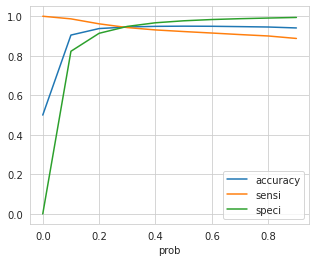

In [ ]:
plt.rcParams['figure.figsize'] = (5,4)
sns.set_style('whitegrid')
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
temp=y_train_smote_pred[['index','Class_actual','prob_1']]
temp['Class_predicted']=temp.prob_1.map(lambda x: 1 if x>0.3 else 0)
y_train_smote_pred=temp
y_train_smote_pred.head()

,index,Class_actual,prob_1,Class_predicted
0,0,0,0.013081,0
1,1,0,0.009355,0
2,2,0,0.003273,0
3,3,0,0.046966,0
4,4,0,0.025236,0


In [ ]:
metrics.accuracy_score(y_train_smote_pred.Class_actual,y_train_smote_pred.Class_predicted)

0.9456420151346137

In [ ]:
confusion_train_smote_lg=metrics.confusion_matrix(y_train_smote_pred.Class_actual,y_train_smote_pred.Class_predicted)
print(confusion_train_smote_lg)

[[188778  10236]
 [ 11400 187614]]


In [ ]:
TP=confusion_train_smote_lg[1,1]
TN=confusion_train_smote_lg[0,0]
FP=confusion_train_smote_lg[0,1]
FN=confusion_train_smote_lg[1,0]
## Sestivity
print("Senstivity of the model is ",TP/float(TP+FN))
## Specifity
print("Specifity of the model is ",TN/float(TN+FP))
## Precision
print("Precision of the model is ",TP/float(TP+FP))
## Recall 
print("Recall of the model is ",TP/float(TP+FN))

Senstivity of the model is  0.9427175977569417
Specifity of the model is  0.9485664325122856
Precision of the model is  0.9482638362395754
Recall of the model is  0.9427175977569417


In [ ]:
### Apply smote on test set as well
X_test_smote, y_test_smote = sm.fit_sample(X_test, y_test)

In [ ]:
len(X_test_smote)

170602

In [ ]:
len(X_test)

85443

In [ ]:
## Predict the y values
y_test_smote_pred=log_bl.predict_proba(X_test_smote)
y_test_smote_pred

array([[9.79293921e-01, 2.07060791e-02],
       [8.52295077e-01, 1.47704923e-01],
       [9.42155097e-01, 5.78449026e-02],
       ...,
       [1.15410265e-05, 9.99988459e-01],
       [2.03392858e-13, 1.00000000e+00],
       [2.29941310e-03, 9.97700587e-01]])

In [ ]:
len(y_test_smote_pred)

170602

In [ ]:
y_test_smote_pred = pd.DataFrame.from_records(y_test_smote_pred)
y_test_smote_pred=y_test_smote_pred.rename(columns={0: 'prob_0',1:'prob_1'})
### Convert y_test_smote to a data_frame and reset the index pr_id as a column
temp2=pd.DataFrame(y_test_smote)
temp2.columns=['Class']
temp2= temp2.reset_index()
y_test_smote_pred['index']=temp2['index']
y_test_smote_pred['Class_actual']=temp2['Class']
temp=y_test_smote_pred[['index','Class_actual','prob_1']]
temp['Class_predicted']=temp.prob_1.map(lambda x: 1 if x>0.3 else 0)
y_test_smote_pred=temp
y_test_smote_pred.head()

,index,Class_actual,prob_1,Class_predicted
0,0,0,0.020706,0
1,1,0,0.147705,0
2,2,0,0.057845,0
3,3,0,0.014922,0
4,4,0,0.983251,1


In [ ]:
### Check the accuracy on test data
metrics.accuracy_score(y_test_smote_pred.Class_actual,y_test_smote_pred.Class_predicted)

0.9359327557707413

In [ ]:
#confusion Matrix
confusion_test=metrics.confusion_matrix(y_test_smote_pred.Class_actual,y_test_smote_pred.Class_predicted)
print(confusion_test)


[[80816  4485]
 [ 6445 78856]]


In [ ]:
TP=confusion_test[1,1]
TN=confusion_test[0,0]
FP=confusion_test[0,1]
FN=confusion_test[1,0]
## Sestivity
print("Senstivity of the model is ",TP/float(TP+FN))
## Specifity
print("Specifity of the model is ",TN/float(TN+FP))
## Precision
print("Precision of the model is ",TP/float(TP+FP))
## Recall 
print("Recall of the model is ",TP/float(TP+FN))

Senstivity of the model is  0.9244440276198403
Specifity of the model is  0.9474214839216422
Precision of the model is  0.9461849509845094
Recall of the model is  0.9244440276198403


### Now let's make predictions with decision tree using the balance Data - SMOTE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
df_classifier = DecisionTreeClassifier(random_state=42)

params_DT_bal = {'criterion': ['gini', 'entropy'],
             'max_depth': [3,4, 5, 6],
             'min_samples_split': [0.03,0.05,0.07,0.09,0.11,0.13],
             'min_samples_leaf': [.002,.01,.05]
             }

folds = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 100)
gs_DT_bal = GridSearchCV(estimator=df_classifier, 
                     param_grid=params_DT_bal, 
                     cv=folds,
                     verbose=1, 
                     scoring='roc_auc',n_jobs=-1)

gs_DT_bal.fit(X_train_smote,y_train_smote);


Fitting 4 folds for each of 144 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed: 23.8min finished


In [ ]:
### Find the best parameters
gs_DT_bal.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 0.002,
 'min_samples_split': 0.03}

In [ ]:
### Find the best score
gs_DT_bal.best_score_

0.9885881153812323

In [ ]:
### Make the predections on train_smote
results_DT_bal = pd.DataFrame(gs_DT_bal.cv_results_['params'])
results_DT_bal['test_smote_score'] = gs_DT_bal.cv_results_['mean_test_score']
results_DT_bal

,criterion,max_depth,min_samples_leaf,min_samples_split,test_smote_score
0,gini,3,0.002,0.03,0.968907
1,gini,3,0.002,0.05,0.968907
2,gini,3,0.002,0.07,0.968151
3,gini,3,0.002,0.09,0.968151
4,gini,3,0.002,0.11,0.968151
...,...,...,...,...,...
139,entropy,6,0.050,0.05,0.981883
140,entropy,6,0.050,0.07,0.981883
141,entropy,6,0.050,0.09,0.981883
142,entropy,6,0.050,0.11,0.981883


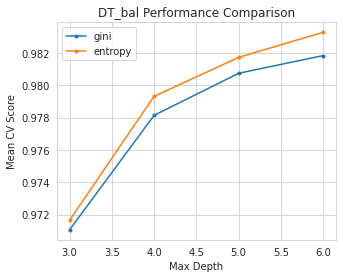

In [ ]:
for i in ['gini', 'entropy']:
    temp = results_DT_bal[results_DT_bal['criterion'] == i]
    temp_average = temp.groupby('max_depth').agg({'test_smote_score': 'mean'})
    plt.plot(temp_average, marker = '.', label = i)
    
    
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel("Mean CV Score")
plt.title("DT_bal Performance Comparison")
plt.show()

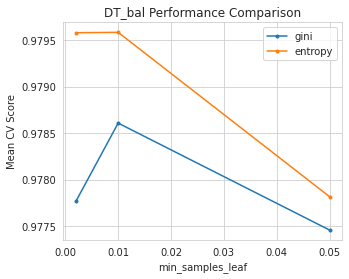

In [ ]:
for i in ['gini', 'entropy']:
    temp = results_DT_bal[results_DT_bal['criterion'] == i]
    temp_average = temp.groupby('min_samples_leaf').agg({'test_smote_score': 'mean'})
    plt.plot(temp_average, marker = '.', label = i)
    
    
plt.legend()
plt.xlabel('min_samples_leaf')
plt.ylabel("Mean CV Score")
plt.title("DT_bal Performance Comparison")
plt.show()

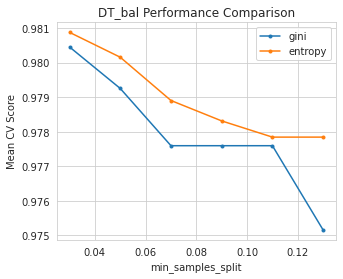

In [ ]:
for i in ['gini', 'entropy']:
    temp = results_DT_bal[results_DT_bal['criterion'] == i]
    temp_average = temp.groupby('min_samples_split').agg({'test_smote_score': 'mean'})
    plt.plot(temp_average, marker = '.', label = i)
    
    
plt.legend()
plt.xlabel('min_samples_split')
plt.ylabel("Mean CV Score")
plt.title("DT_bal Performance Comparison")
plt.show()


In [ ]:
y_train_smote_pred_DT_bal=gs_DT_bal.predict_proba(X_train_smote)
y_train_smote_pred_DT_bal = pd.DataFrame.from_records(y_train_smote_pred_DT_bal)
y_train_smote_pred_DT_bal=y_train_smote_pred_DT_bal.rename(columns={0: 'prob_0',1:'prob_1'})
### Convert y_test_smote to a data_frame and reset the index pr_id as a column
temp2=pd.DataFrame(y_train_smote)
temp2= temp2.reset_index()
y_train_smote_pred_DT_bal['index']=temp2['index']
y_train_smote_pred_DT_bal['Class_actual']=temp2['Class']
temp=y_train_smote_pred_DT_bal[['index','Class_actual','prob_1']]
y_train_smote_pred.head()

,index,Class_actual,prob_1,Class_predicted
0,0,0,0.013081,0
1,1,0,0.009355,0
2,2,0,0.003273,0
3,3,0,0.046966,0
4,4,0,0.025236,0


In [ ]:
prob=[float(x/10) for x in range(10)]
for i in prob:
    y_train_smote_pred_DT_bal[i]=y_train_smote_pred_DT_bal.prob_1.map(lambda x: 1 if x>i else 0)
y_train_smote_pred_DT_bal.head()

,prob_0,prob_1,index,Class_actual,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.985283,0.014717,0,0,1,0,0,0,0,0,0,0,0,0
1,0.985283,0.014717,1,0,1,0,0,0,0,0,0,0,0,0
2,0.985283,0.014717,2,0,1,0,0,0,0,0,0,0,0,0
3,0.881574,0.118426,3,0,1,1,0,0,0,0,0,0,0,0
4,0.985283,0.014717,4,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
prob=[float(x/10) for x in range(10)]
for i in prob:
    y_train_smote_pred_DT_bal[i]=y_train_smote_pred_DT_bal.prob_1.map(lambda x: 1 if x>i else 0)
y_train_smote_pred_DT_bal.head()



cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion_DT_bal[1,1] # true positive 
# TN = confusion_DT_bal[0,0] # true negatives
# FP = confusion_DT_bal[0,1] # false positives
# FN = confusion_DT_bal[1,0] # false negatives

num = prob
for i in num:
    cm1 = metrics.confusion_matrix(y_train_smote_pred_DT_bal.Class_actual, y_train_smote_pred_DT_bal[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df


,prob,accuracy,sensi,speci
0.0,0.0,0.541670,1.000000,0.083341
0.1,0.1,0.905391,0.983021,0.827761
0.2,0.2,0.942157,0.970881,0.913433
0.3,0.3,0.942157,0.970881,0.913433
0.4,0.4,0.950144,0.945667,0.954621
0.5,0.5,0.950144,0.945667,0.954621
0.6,0.6,0.946466,0.907328,0.985604
0.7,0.7,0.943341,0.895299,0.991383
0.8,0.8,0.943341,0.895299,0.991383
0.9,0.9,0.933346,0.869105,0.997588


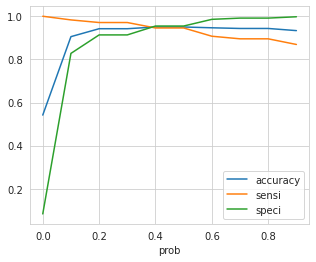

In [ ]:
sns.set_style('whitegrid')
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])



In [ ]:
temp=y_train_smote_pred_DT_bal[['index','Class_actual','prob_1']]
temp['Class_predicted']=temp.prob_1.map(lambda x: 1 if x>0.38 else 0)
y_train_smote_pred_DT_bal=temp
y_train_smote_pred_DT_bal.head()

,index,Class_actual,prob_1,Class_predicted
0,0,0,0.014717,0
1,1,0,0.014717,0
2,2,0,0.014717,0
3,3,0,0.118426,0
4,4,0,0.014717,0


In [ ]:
metrics.accuracy_score(y_train_smote_pred_DT_bal.Class_actual,y_train_smote_pred_DT_bal.Class_predicted)

0.9434738259619926

In [ ]:
#confusion Matrix
confusion_train_smote_DT_bal=metrics.confusion_matrix(y_train_smote_pred_DT_bal.Class_actual,y_train_smote_pred_DT_bal.Class_predicted)
print(confusion_train_smote_DT_bal)

[[183114  15900]
 [  6599 192415]]


In [ ]:
TP=confusion_train_smote_DT_bal[1,1]
TN=confusion_train_smote_DT_bal[0,0]
FP=confusion_train_smote_DT_bal[0,1]
FN=confusion_train_smote_DT_bal[1,0]
## Sestivity
print("Senstivity of the model is ",TP/float(TP+FN))
## Specifity
print("Specifity of the model is ",TN/float(TN+FP))
## Precision
print("Precision of the model is ",TP/float(TP+FP))
## Recall 
print("Recall of the model is ",TP/float(TP+FN))

Senstivity of the model is  0.9668415287366718
Specifity of the model is  0.9201061231873134
Precision of the model is  0.923673283248926
Recall of the model is  0.9668415287366718


In [ ]:
### Apply smote on test set as well
X_test_smote, y_test_smote = sm.fit_sample(X_test, y_test)

In [ ]:
y_test_smote_pred_DT_bal=gs_DT_bal.predict_proba(X_test_smote)
y_test_smote_pred_DT_bal = pd.DataFrame.from_records(y_test_smote_pred_DT_bal)
y_test_smote_pred_DT_bal=y_test_smote_pred_DT_bal.rename(columns={0: 'prob_0',1:'prob_1'})

In [ ]:
temp2=pd.DataFrame(y_test_smote)
temp2.columns=['Class']
temp2= temp2.reset_index()
y_test_smote_pred_DT_bal['index']=temp2['index']
y_test_smote_pred_DT_bal['Class_actual']=temp2['Class']
temp=y_test_smote_pred_DT_bal[['index','Class_actual','prob_1']]
temp['Class_predicted']=temp.prob_1.map(lambda x: 1 if x>0.38 else 0)
y_test_smote_pred_DT_bal=temp
y_test_smote_pred_DT_bal.head()


,index,Class_actual,prob_1,Class_predicted
0,0,0,0.014717,0
1,1,0,0.014717,0
2,2,0,0.014717,0
3,3,0,0.014717,0
4,4,0,0.967941,1


In [ ]:
metrics.accuracy_score(y_test_smote_pred_DT_bal.Class_actual,y_test_smote_pred_DT_bal.Class_predicted)

0.9162319316303443

In [ ]:
#confusion Matrix
confusion_test_smote_DT_bal=metrics.confusion_matrix(y_test_smote_pred_DT_bal.Class_actual,y_test_smote_pred_DT_bal.Class_predicted)
print(confusion_test_smote_DT_bal)


TP=confusion_test_smote_DT_bal[1,1]
TN=confusion_test_smote_DT_bal[0,0]
FP=confusion_test_smote_DT_bal[0,1]
FN=confusion_test_smote_DT_bal[1,0]
## Sestivity
print("Senstivity of the model is ",TP/float(TP+FN))
## Specifity
print("Specifity of the model is ",TN/float(TN+FP))
## Precision
print("Precision of the model is ",TP/float(TP+FP))
## Recall 
print("Recall of the model is ",TP/float(TP+FN))

[[78354  6947]
 [ 7344 77957]]
Senstivity of the model is  0.9139048780201874
Specifity of the model is  0.9185589852405013
Precision of the model is  0.9181781777065863
Recall of the model is  0.9139048780201874


### Now let's build the random forest model with 500 trees on balanced Data Set - SMOTE

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 500 decision trees
rf_bl = RandomForestRegressor(n_estimators = 500, random_state = 42)
# Train the model on training data
rf_bl.fit(X_train_smote, y_train_smote)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
rf_bl.base_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
# make predictions on test data
y_train_bal_pred_rf_bal = rf_bl.predict(X_train_smote)
temp=pd.DataFrame(y_train_bal_pred_rf_bal)
temp=temp.rename(columns={0: 'prob'})
temp2=pd.DataFrame(y_train_smote)
temp2= temp2.reset_index()
temp['Class_actual']=temp2['Class']
y_train_bal_pred_rf_bal=temp
y_train_bal_pred_rf_bal.head()

,prob,Class_actual
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0


In [ ]:

prob=[float(x/10) for x in range(10)]
for i in prob:
    y_train_bal_pred_rf_bal[i]=y_train_bal_pred_rf_bal.prob.map(lambda x: 1 if x>i else 0)
y_train_bal_pred_rf_bal.head()

,prob,Class_actual,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = prob
for i in num:
    cm1 = metrics.confusion_matrix(y_train_bal_pred_rf_bal.Class_actual, y_train_bal_pred_rf_bal[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.959995,1.000000,0.919991
0.1,0.1,0.998947,1.000000,0.997895
0.2,0.2,0.999626,1.000000,0.999251
0.3,0.3,0.999884,1.000000,0.999769
0.4,0.4,0.999995,1.000000,0.999990
0.5,0.5,1.000000,1.000000,1.000000
0.6,0.6,1.000000,1.000000,1.000000
0.7,0.7,0.999992,0.999985,1.000000
0.8,0.8,0.999957,0.999915,1.000000
0.9,0.9,0.999606,0.999211,1.000000


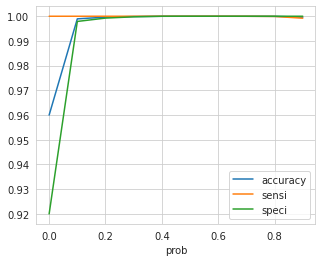

In [ ]:
sns.set_style('whitegrid')
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])

In [ ]:
temp=y_train_bal_pred_rf_bal[['Class_actual','prob']]
temp['Class_predicted']=temp.prob.map(lambda x: 1 if x>0.2 else 0)
y_train_bal_pred_rf_bal=temp
y_train_bal_pred_rf_bal.head()

,Class_actual,prob,Class_predicted
0,0,0.0,0
1,0,0.0,0
2,0,0.0,0
3,0,0.0,0
4,0,0.0,0


In [ ]:
### Check the accuracy of the random forest model
metrics.accuracy_score(y_train_bal_pred_rf_bal.Class_actual,y_train_bal_pred_rf_bal.Class_predicted)

0.9996256544765695

In [ ]:
#confusion Matrix
confusion_train_bal_rf_bal=metrics.confusion_matrix(y_train_bal_pred_rf_bal.Class_actual,y_train_bal_pred_rf_bal.Class_predicted)
print(confusion_train_bal_rf_bal)


[[198865    149]
 [     0 199014]]


In [ ]:
TP=confusion_train_bal_rf_bal[1,1]
TN=confusion_train_bal_rf_bal[0,0]
FP=confusion_train_bal_rf_bal[0,1]
FN=confusion_train_bal_rf_bal[1,0]
## Sestivity
print("Senstivity of the model is ",TP/float(TP+FN))
## Specifity
print("Specifity of the model is ",TN/float(TN+FP))
## Precision
print("Precision of the model is ",TP/float(TP+FP))
## Recall 
print("Recall of the model is ",TP/float(TP+FN))

Senstivity of the model is  1.0
Specifity of the model is  0.999251308953139
Precision of the model is  0.9992518690720666
Recall of the model is  1.0


In [ ]:
# make predictions on test data
y_test_pred_rf_bal = rf_bl.predict(X_test_smote)
temp=pd.DataFrame(y_test_pred_rf_bal)
temp=temp.rename(columns={0: 'prob'})
temp2=pd.DataFrame(y_test_smote)
temp2.columns=['Class']
temp2= temp2.reset_index()
temp['Class_actual']=temp2['Class']
y_test_pred_rf_bal=temp
y_test_pred_rf_bal.head()

,prob,Class_actual
0,0.000,0
1,0.000,0
2,0.000,0
3,0.000,0
4,0.548,0


In [ ]:
temp=y_test_pred_rf_bal[['Class_actual','prob']]
temp['Class_predicted']=temp.prob.map(lambda x: 1 if x>0.2 else 0)
y_test_pred_rf_bal=temp
y_test_pred_rf_bal.head()

,Class_actual,prob,Class_predicted
0,0,0.000,0
1,0,0.000,0
2,0,0.000,0
3,0,0.000,0
4,0,0.548,1


In [ ]:
### Check the accuracy of the random forest model

metrics.accuracy_score(y_test_pred_rf_bal.Class_actual,y_test_pred_rf_bal.Class_predicted)

0.9139166012121781

In [ ]:
#confusion Matrix
confusion_test_rf_bal=metrics.confusion_matrix(y_test_pred_rf_bal.Class_actual,y_test_pred_rf_bal.Class_predicted)
print(confusion_test_rf_bal)

[[85012   289]
 [14397 70904]]


In [ ]:

TP=confusion_test_rf_bal[1,1]
TN=confusion_test_rf_bal[0,0]
FP=confusion_test_rf_bal[0,1]
FN=confusion_test_rf_bal[1,0]
## Sestivity
print("Senstivity of the model is ",TP/float(TP+FN))
## Specifity
print("Specifity of the model is ",TN/float(TN+FP))
## Precision
print("Precision of the model is ",TP/float(TP+FP))
## Recall 
print("Recall of the model is ",TP/float(TP+FN))

Senstivity of the model is  0.8312212049096728
Specifity of the model is  0.9966119975146833
Precision of the model is  0.9959406121388339
Recall of the model is  0.8312212049096728


### Now let's build the model with 300-400 decision trees with the best hyperparameters we got earlier from the unbalanced model - SMOTE

In [ ]:
param_grid = {'bootstrap':[True], 'ccp_alpha':[0.0], 'criterion':['mse'],
                      'max_depth':[4], 'max_features':['sqrt'], 'max_leaf_nodes':[None],
                      'max_samples':[None], 'min_impurity_decrease':[0.0],
                      'min_impurity_split':[None], 'min_samples_leaf':[0.009],
                      'min_samples_split':[0.01], 'min_weight_fraction_leaf':[0.0],
                      'n_estimators':[301,325,351,375,400], 'n_jobs':[None], 'oob_score':[False],
                      'random_state':[42], 'warm_start':[True]	}	
print (param_grid)
rf = RandomForestRegressor()

{'bootstrap': [True], 'ccp_alpha': [0.0], 'criterion': ['mse'], 'max_depth': [4], 'max_features': ['sqrt'], 'max_leaf_nodes': [None], 'max_samples': [None], 'min_impurity_decrease': [0.0], 'min_impurity_split': [None], 'min_samples_leaf': [0.009], 'min_samples_split': [0.01], 'min_weight_fraction_leaf': [0.0], 'n_estimators': [301, 325, 351, 375, 400], 'n_jobs': [None], 'oob_score': [False], 'random_state': [42], 'warm_start': [True]}


In [ ]:
rf_300_400_bal = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 4, n_jobs = -1, verbose=2)

In [ ]:
rf_300_400_bal.fit(X_train_smote,y_train_smote)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 34.1min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, rand...
                         'max_samples': [None], 'min_impurity_decrease': [0.0],
                         'min_impurity_sp

In [ ]:
rf_300_400_bal

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, rand...
                         'max_samples': [None], 'min_impurity_decrease': [0.0],
                         'min_impurity_sp

In [ ]:
### Prediction on train_smote
y_train_smote_pred_300_400=rf_300_400_bal.predict(X_train_smote)
temp=pd.DataFrame(y_train_smote_pred_300_400)
temp=temp.rename(columns={0: 'prob'})
temp2=pd.DataFrame(y_train_smote)
temp2=temp2.reset_index()
temp['Class_actual']=temp2['Class']
y_train_smote_pred_300_400=temp
y_train_smote_pred_300_400.head()

,prob,Class_actual
0,0.163842,0
1,0.074044,0
2,0.062897,0
3,0.109545,0
4,0.058939,0


In [ ]:
### get the cutoffs on different probabilities
prob=[float(x/10) for x in range(10)]
for i in prob:
    y_train_smote_pred_300_400[i]=y_train_smote_pred_300_400.prob.map(lambda x: 1 if x>i else 0)
y_train_smote_pred_300_400.head()

,prob,Class_actual,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.163842,0,1,1,0,0,0,0,0,0,0,0
1,0.074044,0,1,0,0,0,0,0,0,0,0,0
2,0.062897,0,1,0,0,0,0,0,0,0,0,0
3,0.109545,0,1,1,0,0,0,0,0,0,0,0
4,0.058939,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
### Create cutoff_df with different metrics on different probabilities

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = prob
for i in num:
    cm1 = metrics.confusion_matrix(y_train_smote_pred_300_400.Class_actual, y_train_smote_pred_300_400[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df


,prob,accuracy,sensi,speci
0.0,0.0,0.500000,1.000000,0.000000
0.1,0.1,0.825304,0.994086,0.656522
0.2,0.2,0.920237,0.947637,0.892837
0.3,0.3,0.943034,0.926679,0.959390
0.4,0.4,0.949443,0.917337,0.981549
0.5,0.5,0.943514,0.892902,0.994126
0.6,0.6,0.939436,0.881837,0.997035
0.7,0.7,0.934575,0.870155,0.998995
0.8,0.8,0.917719,0.835765,0.999673
0.9,0.9,0.894729,0.789618,0.999839


<Figure size 640x480 with 0 Axes>

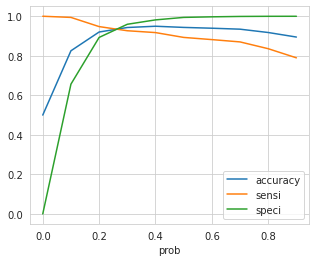

In [ ]:
### plot the selectivity, senstivity and Specificity at different cutoffs
from matplotlib.pyplot import figure
figure(num=None, figsize=(8,6), dpi=80, facecolor='w', edgecolor='k')
sns.set_style('whitegrid')
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
### predict values on selected cutoff
temp=y_train_smote_pred_300_400[['Class_actual','prob']]
temp['Class_predicted']=temp.prob.map(lambda x: 1 if x>0.25 else 0)
y_train_smote_pred_300_400=temp
y_train_smote_pred_300_400.head()


,Class_actual,prob,Class_predicted
0,0,0.163842,0
1,0,0.074044,0
2,0,0.062897,0
3,0,0.109545,0
4,0,0.058939,0


In [ ]:
### Accuracy
metrics.accuracy_score(y_train_smote_pred_300_400.Class_actual,y_train_smote_pred_300_400.Class_predicted)


0.9376023797320792

In [ ]:
### Confusion matrix

#confusion Matrix
confusion_gs_300_400_train_smote=metrics.confusion_matrix(y_train_smote_pred_300_400.Class_actual,y_train_smote_pred_300_400.Class_predicted)
print(confusion_gs_300_400_train_smote)


[[187038  11976]
 [ 12860 186154]]


In [ ]:
### Print Other metrics
TP=confusion_gs_300_400_train_smote[1,1]
TN=confusion_gs_300_400_train_smote[0,0]
FP=confusion_gs_300_400_train_smote[0,1]
FN=confusion_gs_300_400_train_smote[1,0]
## Sestivity
print("Senstivity of the model is ",TP/float(TP+FN))
## Specifity
print("Specifity of the model is ",TN/float(TN+FP))
## Precision
print("Precision of the model is ",TP/float(TP+FP))
## Recall 
print("Recall of the model is ",TP/float(TP+FN))

Senstivity of the model is  0.935381430452129
Specifity of the model is  0.9398233290120293
Precision of the model is  0.9395548377328017
Recall of the model is  0.935381430452129


In [ ]:
### Predictions on test

y_test_smote_pred_300_400 = rf_300_400_bal.predict(X_test_smote)
temp=pd.DataFrame(y_test_smote_pred_300_400)
temp=temp.rename(columns={0: 'prob'})
temp2=pd.DataFrame(y_test_smote)
temp2.columns=['Class']
temp2= temp2.reset_index()
temp['Class_actual']=temp2['Class']
y_test_smote_pred_300_400=temp
temp=y_test_smote_pred_300_400[['Class_actual','prob']]
temp['Class_predicted']=temp.prob.map(lambda x: 1 if x>0.25 else 0)
y_test_smote_pred_300_400=temp
y_test_smote_pred_300_400.head()

,Class_actual,prob,Class_predicted
0,0,0.062837,0
1,0,0.179373,0
2,0,0.059392,0
3,0,0.086428,0
4,0,0.657180,1


In [ ]:
### Accuracy
metrics.accuracy_score(y_test_smote_pred_300_400.Class_actual,y_test_smote_pred_300_400.Class_predicted)

0.9063316959941853

In [ ]:
### test confusion metrics
confusion_gs_test_300_400_M1=metrics.confusion_matrix(y_test_smote_pred_300_400.Class_actual,y_test_smote_pred_300_400.Class_predicted)
print(confusion_gs_test_300_400_M1)


### Other metrics on test
TP=confusion_gs_test_300_400_M1[1,1]
TN=confusion_gs_test_300_400_M1[0,0]
FP=confusion_gs_test_300_400_M1[0,1]
FN=confusion_gs_test_300_400_M1[1,0]
## Sestivity
print("Senstivity of the model is ",TP/float(TP+FN))
## Specifity
print("Specifity of the model is ",TN/float(TN+FP))
## Precision
print("Precision of the model is ",TP/float(TP+FP))
## Recall 
print("Recall of the model is ",TP/float(TP+FN))


[[80081  5220]
 [10760 74541]]
Senstivity of the model is  0.8738584541799042
Specifity of the model is  0.9388049378084665
Precision of the model is  0.9345544815135216
Recall of the model is  0.8738584541799042


### Now let's do the data balancing with ADASYN and make the models

### Print the class distribution after applying ADASYN

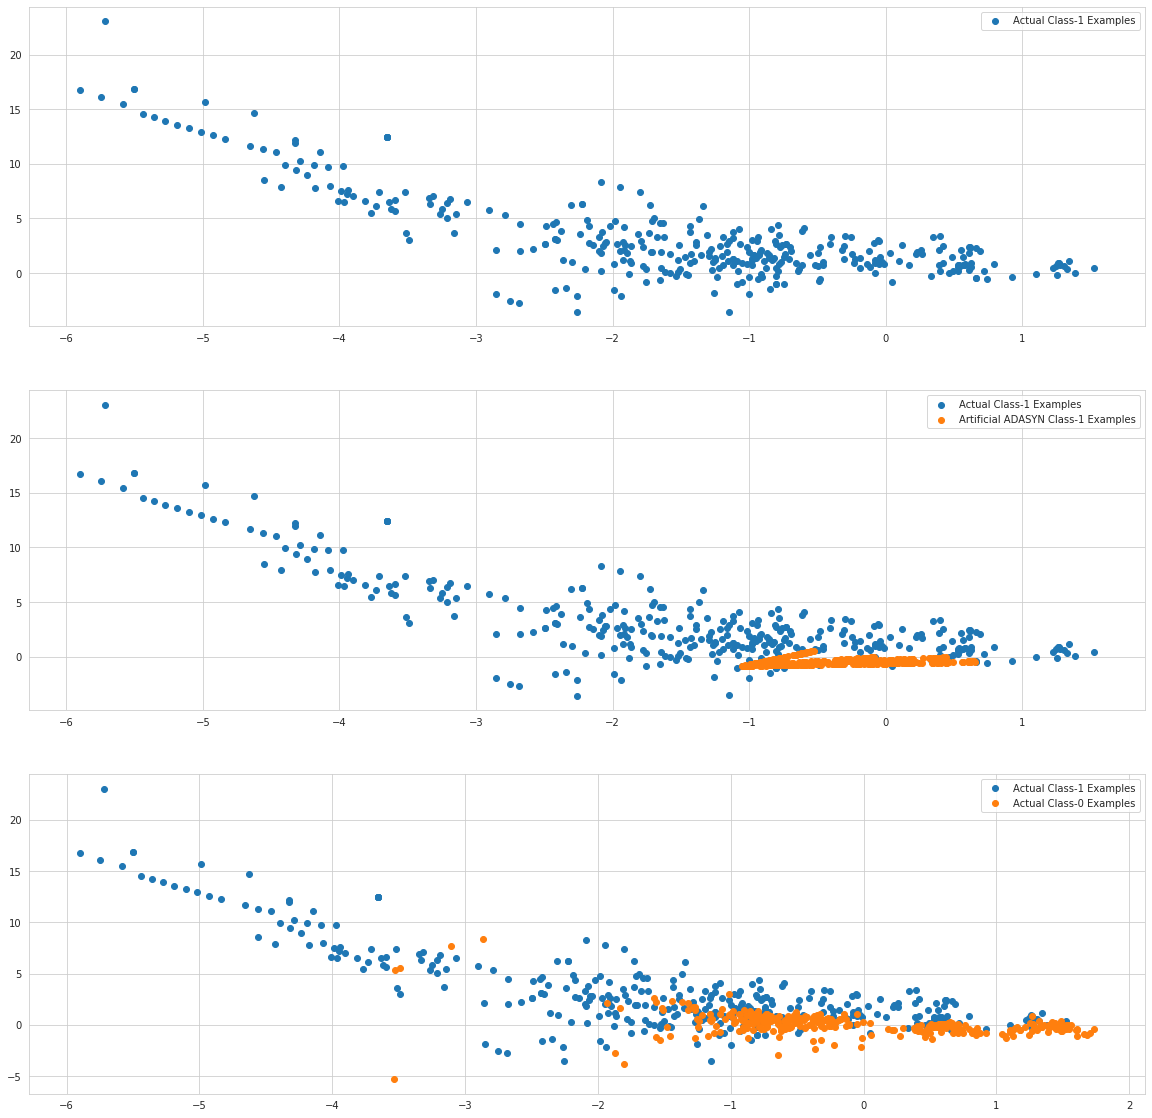

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

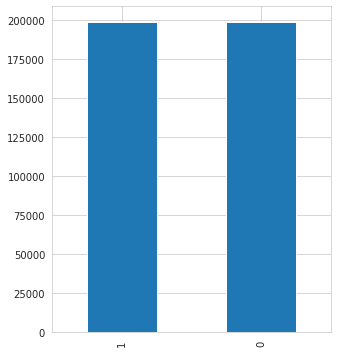

In [ ]:
plt.rcParams['figure.figsize'] = [5,6]
y_train_adasyn=pd.DataFrame(y_train_adasyn)
y_train_adasyn.columns=['Class']
y_train_adasyn.Class.value_counts().plot(kind='bar')

### Logistic Regression - ADASYN

In [ ]:
logistic = LogisticRegression(class_weight='balanced')
# create pipeline
steps = [("logistic", logistic)]

# compile pipeline
log = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['10','l1', 'l2','13']}

# create 4 folds
folds = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 100)

# create gridsearch object
log_bl_ada = GridSearchCV(estimator=log, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [ ]:
log_bl_ada.fit(X_train_adasyn,y_train_adasyn)

Fitting 4 folds for each of 32 candidates, totalling 128 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:   24.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=100, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight='balanced',
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                             

In [ ]:
log_bl_ada.best_estimator_

Pipeline(memory=None,
         steps=[('logistic',
                 LogisticRegression(C=10, class_weight='balanced', dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [ ]:
y_train_adasyn_pred=log_bl_ada.predict_proba(X_train_adasyn)
y_train_adasyn_pred

array([[0.96376289, 0.03623711],
       [0.9682151 , 0.0317849 ],
       [0.99592347, 0.00407653],
       ...,
       [0.01762651, 0.98237349],
       [0.00200006, 0.99799994],
       [0.07703542, 0.92296458]])

In [ ]:
### Create a temp dataframe having the columns for probability for '0' and '1'
y_train_adasyn_pred = pd.DataFrame.from_records(y_train_adasyn_pred)
y_train_adasyn_pred=y_train_adasyn_pred.rename(columns={0: 'prob_0',1:'prob_1'})
y_train_adasyn_pred.head()


,prob_0,prob_1
0,0.963763,0.036237
1,0.968215,0.031785
2,0.995923,0.004077
3,0.806325,0.193675
4,0.927204,0.072796


In [ ]:

### Convert y_test_adasyn to a data_frame and reset the index pr_id as a column
temp2=pd.DataFrame(y_train_adasyn)
temp2= temp2.reset_index()
### Add the columns of previous dataframe into y_train_adasyn_pred
y_train_adasyn_pred['index']=temp2['index']
y_train_adasyn_pred['Class_actual']=temp2['Class']
y_train_adasyn_pred.head()


,prob_0,prob_1,index,Class_actual
0,0.963763,0.036237,0,0
1,0.968215,0.031785,1,0
2,0.995923,0.004077,2,0
3,0.806325,0.193675,3,0
4,0.927204,0.072796,4,0


In [ ]:
### predict the Values on different probabilities
prob=[float(x/10) for x in range(10)]
for i in prob:
    y_train_adasyn_pred[i]=y_train_adasyn_pred.prob_1.map(lambda x: 1 if x>i else 0)
y_train_adasyn_pred.head()

,prob_0,prob_1,index,Class_actual,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.963763,0.036237,0,0,1,0,0,0,0,0,0,0,0,0
1,0.968215,0.031785,1,0,1,0,0,0,0,0,0,0,0,0
2,0.995923,0.004077,2,0,1,0,0,0,0,0,0,0,0,0
3,0.806325,0.193675,3,0,1,1,0,0,0,0,0,0,0,0
4,0.927204,0.072796,4,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = prob
for i in num:
    cm1 = metrics.confusion_matrix(y_train_adasyn_pred.Class_actual, y_train_adasyn_pred[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.500062,1.000000,0.000000
0.1,0.1,0.786536,0.993610,0.579411
0.2,0.2,0.868649,0.983101,0.754168
0.3,0.3,0.893018,0.949066,0.836956
0.4,0.4,0.893611,0.904568,0.882651
0.5,0.5,0.885932,0.858693,0.913177
0.6,0.6,0.867239,0.798591,0.935904
0.7,0.7,0.851890,0.749873,0.953933
0.8,0.8,0.840614,0.712332,0.968927
0.9,0.9,0.820037,0.658786,0.981328


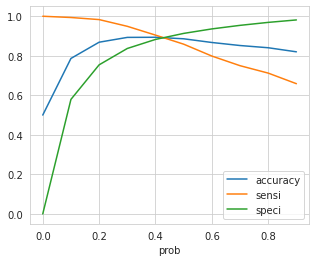

In [ ]:
### Find the optimum cutoff
plt.rcParams['figure.figsize'] = (5,4)
sns.set_style('whitegrid')
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
temp=y_train_adasyn_pred[['index','Class_actual','prob_1']]
temp['Class_predicted']=temp.prob_1.map(lambda x: 1 if x>0.42 else 0)
y_train_adasyn_pred=temp
y_train_adasyn_pred.head()

,index,Class_actual,prob_1,Class_predicted
0,0,0,0.036237,0
1,1,0,0.031785,0
2,2,0,0.004077,0
3,3,0,0.193675,0
4,4,0,0.072796,0


In [ ]:
metrics.accuracy_score(y_train_adasyn_pred.Class_actual,y_train_adasyn_pred.Class_predicted)

0.8929151897748425

In [ ]:

confusion_train_adasyn_lg=metrics.confusion_matrix(y_train_adasyn_pred.Class_actual,y_train_adasyn_pred.Class_predicted)
print(confusion_train_adasyn_lg)

[[177052  21962]
 [ 20666 178397]]


In [ ]:
### Other metrics on test
TP=confusion_train_adasyn_lg[1,1]
TN=confusion_train_adasyn_lg[0,0]
FP=confusion_train_adasyn_lg[0,1]
FN=confusion_train_adasyn_lg[1,0]
## Sestivity
print("Senstivity of the model is ",TP/float(TP+FN))
## Specifity
print("Specifity of the model is ",TN/float(TN+FP))
## Precision
print("Precision of the model is ",TP/float(TP+FP))
## Recall 
print("Recall of the model is ",TP/float(TP+FN))

Senstivity of the model is  0.8961836202609225
Specifity of the model is  0.8896459545559608
Precision of the model is  0.8903867557733868
Recall of the model is  0.8961836202609225


In [ ]:
### Apply adasyn on test set as well
X_test_adasyn, y_test_adasyn = ada.fit_sample(X_test, y_test)

In [ ]:
## Predict the y values
y_test_adasyn_pred=log_bl_ada.predict_proba(X_test_adasyn)
y_test_adasyn_pred

array([[9.44366220e-01, 5.56337801e-02],
       [7.33112722e-01, 2.66887278e-01],
       [8.59225922e-01, 1.40774078e-01],
       ...,
       [5.70654635e-14, 1.00000000e+00],
       [7.14983628e-14, 1.00000000e+00],
       [8.90398866e-14, 1.00000000e+00]])

In [ ]:
y_test_adasyn_pred = pd.DataFrame.from_records(y_test_adasyn_pred)
y_test_adasyn_pred=y_test_adasyn_pred.rename(columns={0: 'prob_0',1:'prob_1'})
### Convert y_test_adasyn to a data_frame and reset the index pr_id as a column
temp2=pd.DataFrame(y_test_adasyn)
temp2.columns=['Class']
temp2= temp2.reset_index()
y_test_adasyn_pred['index']=temp2['index']
y_test_adasyn_pred['Class_actual']=temp2['Class']
temp=y_test_adasyn_pred[['index','Class_actual','prob_1']]
temp['Class_predicted']=temp.prob_1.map(lambda x: 1 if x>0.3 else 0)
y_test_adasyn_pred=temp
y_test_adasyn_pred.head()

,index,Class_actual,prob_1,Class_predicted
0,0,0,0.055634,0
1,1,0,0.266887,0
2,2,0,0.140774,0
3,3,0,0.041527,0
4,4,0,0.998625,1


In [ ]:
### Check the accuracy on test data
metrics.accuracy_score(y_test_adasyn_pred.Class_actual,y_test_adasyn_pred.Class_predicted)

0.8727226898637718

In [ ]:
#confusion Matrix
confusion_test=metrics.confusion_matrix(y_test_adasyn_pred.Class_actual,y_test_adasyn_pred.Class_predicted)
print(confusion_test)

[[71109 14192]
 [ 7521 77774]]


In [ ]:

TP=confusion_test[1,1]
TN=confusion_test[0,0]
FP=confusion_test[0,1]
FN=confusion_test[1,0]
## Sestivity
print("Senstivity of the model is ",TP/float(TP+FN))
## Specifity
print("Specifity of the model is ",TN/float(TN+FP))
## Precision
print("Precision of the model is ",TP/float(TP+FP))
## Recall 
print("Recall of the model is ",TP/float(TP+FN))

Senstivity of the model is  0.9118236707896126
Specifity of the model is  0.8336244592677694
Precision of the model is  0.8456820999064871
Recall of the model is  0.9118236707896126


### Now let's apply decision tree on balanced dataset balanced by ADASYN

In [ ]:
from sklearn.tree import DecisionTreeClassifier
df_classifier = DecisionTreeClassifier(random_state=42)

params_DT_bal = {'criterion': ['gini', 'entropy'],
             'max_depth': [3,4, 5, 6],
             'min_samples_split': [0.03,0.05,0.07,0.09,0.11,0.13],
             'min_samples_leaf': [.002,.01,.05]
             }

folds = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 100)
gs_DT_bal_ada= GridSearchCV(estimator=df_classifier, 
                     param_grid=params_DT_bal, 
                     cv=folds,
                     verbose=1, 
                     scoring='roc_auc',n_jobs=-1)

gs_DT_bal_ada.fit(X_train_adasyn,y_train_adasyn)

Fitting 4 folds for each of 144 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed: 23.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=100, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
           

In [ ]:
### Find the best parameters
gs_DT_bal_ada.best_params_


{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 0.002,
 'min_samples_split': 0.03}

In [ ]:
### Find the best score
gs_DT_bal_ada.best_score_

0.9700725268906331

In [ ]:
### Make the predections on train_ada
results_DT_bal = pd.DataFrame(gs_DT_bal_ada.cv_results_['params'])
results_DT_bal['test_ada_score'] = gs_DT_bal_ada.cv_results_['mean_test_score']
results_DT_bal

,criterion,max_depth,min_samples_leaf,min_samples_split,test_ada_score
0,gini,3,0.002,0.03,0.906562
1,gini,3,0.002,0.05,0.906562
2,gini,3,0.002,0.07,0.906562
3,gini,3,0.002,0.09,0.906562
4,gini,3,0.002,0.11,0.906562
...,...,...,...,...,...
139,entropy,6,0.050,0.05,0.946366
140,entropy,6,0.050,0.07,0.946366
141,entropy,6,0.050,0.09,0.946366
142,entropy,6,0.050,0.11,0.943661


In [ ]:
y_train_adasyn_pred_DT_bal=gs_DT_bal_ada.predict_proba(X_train_adasyn)
y_train_adasyn_pred_DT_bal = pd.DataFrame.from_records(y_train_adasyn_pred_DT_bal)
y_train_adasyn_pred_DT_bal=y_train_adasyn_pred_DT_bal.rename(columns={0: 'prob_0',1:'prob_1'})
### Convert y_train_adasyn to a data_frame and reset the index pr_id as a column
temp2=pd.DataFrame(y_train_adasyn)
temp2= temp2.reset_index()
y_train_adasyn_pred_DT_bal['index']=temp2['index']
y_train_adasyn_pred_DT_bal['Class_actual']=temp2['Class']
temp=y_train_adasyn_pred_DT_bal[['index','Class_actual','prob_1']]
y_train_adasyn_pred.head()

,index,Class_actual,prob_1,Class_predicted
0,0,0,0.036237,0
1,1,0,0.031785,0
2,2,0,0.004077,0
3,3,0,0.193675,0
4,4,0,0.072796,0


In [ ]:
prob=[float(x/10) for x in range(10)]
for i in prob:
    y_train_adasyn_pred_DT_bal[i]=y_train_adasyn_pred_DT_bal.prob_1.map(lambda x: 1 if x>i else 0)
y_train_adasyn_pred_DT_bal.head()


,prob_0,prob_1,index,Class_actual,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.866356,0.133644,0,0,1,1,0,0,0,0,0,0,0,0
1,0.999910,0.000090,1,0,1,0,0,0,0,0,0,0,0,0
2,1.000000,0.000000,2,0,0,0,0,0,0,0,0,0,0,0
3,0.507308,0.492692,3,0,1,1,1,1,1,0,0,0,0,0
4,0.999910,0.000090,4,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
prob=[float(x/10) for x in range(10)]
for i in prob:
    y_train_adasyn_pred_DT_bal[i]=y_train_adasyn_pred_DT_bal.prob_1.map(lambda x: 1 if x>i else 0)
y_train_adasyn_pred_DT_bal.head()

,prob_0,prob_1,index,Class_actual,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.866356,0.133644,0,0,1,1,0,0,0,0,0,0,0,0
1,0.999910,0.000090,1,0,1,0,0,0,0,0,0,0,0,0
2,1.000000,0.000000,2,0,0,0,0,0,0,0,0,0,0,0
3,0.507308,0.492692,3,0,1,1,1,1,1,0,0,0,0,0
4,0.999910,0.000090,4,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion_DT_bal[1,1] # true positive 
# TN = confusion_DT_bal[0,0] # true negatives
# FP = confusion_DT_bal[0,1] # false positives
# FN = confusion_DT_bal[1,0] # false negatives

num = prob
for i in num:
    cm1 = metrics.confusion_matrix(y_train_adasyn_pred_DT_bal.Class_actual, y_train_adasyn_pred_DT_bal[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df



,prob,accuracy,sensi,speci
0.0,0.0,0.693343,1.000000,0.386611
0.1,0.1,0.814320,0.995871,0.632724
0.2,0.2,0.894425,0.966026,0.822806
0.3,0.3,0.894425,0.966026,0.822806
0.4,0.4,0.894425,0.966026,0.822806
0.5,0.5,0.896844,0.854423,0.939276
0.6,0.6,0.896626,0.848329,0.944934
0.7,0.7,0.896626,0.848329,0.944934
0.8,0.8,0.858500,0.739148,0.977881
0.9,0.9,0.846618,0.710685,0.982584


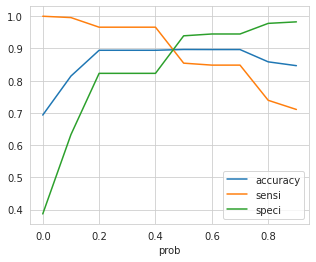

In [ ]:
sns.set_style('whitegrid')
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])

In [ ]:
temp=y_train_adasyn_pred_DT_bal[['index','Class_actual','prob_1']]
temp['Class_predicted']=temp.prob_1.map(lambda x: 1 if x>0.48 else 0)
y_train_adasyn_pred_DT_bal=temp
y_train_adasyn_pred_DT_bal.head()

,index,Class_actual,prob_1,Class_predicted
0,0,0,0.133644,0
1,1,0,0.000090,0
2,2,0,0.000000,0
3,3,0,0.492692,1
4,4,0,0.000090,0


In [ ]:
metrics.accuracy_score(y_train_adasyn_pred_DT_bal.Class_actual,y_train_adasyn_pred_DT_bal.Class_predicted)

0.895464947736242

In [ ]:
#confusion Matrix
confusion_train_ada_DT_bal=metrics.confusion_matrix(y_train_adasyn_pred_DT_bal.Class_actual,y_train_adasyn_pred_DT_bal.Class_predicted)
print(confusion_train_ada_DT_bal)


TP=confusion_train_ada_DT_bal[1,1]
TN=confusion_train_ada_DT_bal[0,0]
FP=confusion_train_ada_DT_bal[0,1]
FN=confusion_train_ada_DT_bal[1,0]
## Sestivity
print("Senstivity of the model is ",TP/float(TP+FN))
## Specifity
print("Specifity of the model is ",TN/float(TN+FP))
## Precision
print("Precision of the model is ",TP/float(TP+FP))
## Recall 
print("Recall of the model is ",TP/float(TP+FN))


[[167873  31141]
 [ 10472 188591]]
Senstivity of the model is  0.9473935387289452
Specifity of the model is  0.8435235712060458
Precision of the model is  0.8582773560519178
Recall of the model is  0.9473935387289452


In [ ]:
### Apply ada on test set as well
X_test_adasyn, y_test_adasyn = ada.fit_sample(X_test, y_test)

In [ ]:
y_test_adasyn_pred_DT_bal=gs_DT_bal_ada.predict_proba(X_test_adasyn)
y_test_adasyn_pred_DT_bal = pd.DataFrame.from_records(y_test_adasyn_pred_DT_bal)
y_test_adasyn_pred_DT_bal=y_test_adasyn_pred_DT_bal.rename(columns={0: 'prob_0',1:'prob_1'})

In [ ]:
temp2=pd.DataFrame(y_test_adasyn)
temp2.columns=['Class']
temp2= temp2.reset_index()
y_test_adasyn_pred_DT_bal['index']=temp2['index']
y_test_adasyn_pred_DT_bal['Class_actual']=temp2['Class']
temp=y_test_adasyn_pred_DT_bal[['index','Class_actual','prob_1']]
temp['Class_predicted']=temp.prob_1.map(lambda x: 1 if x>0.48 else 0)
y_test_adasyn_pred_DT_bal=temp
y_test_adasyn_pred_DT_bal.head()

,index,Class_actual,prob_1,Class_predicted
0,0,0,0.000000,0
1,1,0,0.133644,0
2,2,0,0.000000,0
3,3,0,0.133644,0
4,4,0,0.756906,1


In [ ]:
metrics.accuracy_score(y_test_adasyn_pred_DT_bal.Class_actual,y_test_adasyn_pred_DT_bal.Class_predicted)

0.8457056437431124

In [ ]:
#confusion Matrix
confusion_test_ada_DT_bal=metrics.confusion_matrix(y_test_adasyn_pred_DT_bal.Class_actual,y_test_adasyn_pred_DT_bal.Class_predicted)
print(confusion_test_ada_DT_bal)


TP=confusion_test_ada_DT_bal[1,1]
TN=confusion_test_ada_DT_bal[0,0]
FP=confusion_test_ada_DT_bal[0,1]
FN=confusion_test_ada_DT_bal[1,0]
## Sestivity
print("Senstivity of the model is ",TP/float(TP+FN))
## Specifity
print("Specifity of the model is ",TN/float(TN+FP))
## Precision
print("Precision of the model is ",TP/float(TP+FP))
## Recall 
print("Recall of the model is ",TP/float(TP+FN))


[[71984 13317]
 [13005 72290]]
Senstivity of the model is  0.8475291634914122
Specifity of the model is  0.8438822522596453
Precision of the model is  0.8444402910976906
Recall of the model is  0.8475291634914122


### Now let's build random forest model on data set balanced by ADASYN with 300-400 Trees

In [ ]:
print(param_grid)

{'bootstrap': [True], 'ccp_alpha': [0.0], 'criterion': ['mse'], 'max_depth': [4], 'max_features': ['sqrt'], 'max_leaf_nodes': [None], 'max_samples': [None], 'min_impurity_decrease': [0.0], 'min_impurity_split': [None], 'min_samples_leaf': [0.009], 'min_samples_split': [0.01], 'min_weight_fraction_leaf': [0.0], 'n_estimators': [301, 325, 351, 375, 400], 'n_jobs': [None], 'oob_score': [False], 'random_state': [42], 'warm_start': [True]}


In [ ]:
rf_300_400_bal_ada = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 4, n_jobs = -1, verbose=2)

In [ ]:
rf_300_400_bal_ada.fit(X_train_adasyn,y_train_adasyn)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 33.9min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, rand...
                         'max_samples': [None], 'min_impurity_decrease': [0.0],
                         'min_impurity_sp

In [ ]:
### Prediction on train_ada
y_train_adasyn_pred_300_400=rf_300_400_bal_ada.predict(X_train_adasyn)
temp=pd.DataFrame(y_train_adasyn_pred_300_400)
temp=temp.rename(columns={0: 'prob'})
temp2=pd.DataFrame(y_train_adasyn)
temp2.columns=['Class']
temp2=temp2.reset_index()
temp['Class_actual']=temp2['Class']
y_train_adasyn_pred_300_400=temp
y_train_adasyn_pred_300_400.head()


,prob,Class_actual
0,0.245606,0
1,0.171453,0
2,0.134301,0
3,0.313905,0
4,0.118548,0


In [ ]:
### get the cutoffs on different probabilities
prob=[float(x/10) for x in range(10)]
for i in prob:
    y_train_adasyn_pred_300_400[i]=y_train_adasyn_pred_300_400.prob.map(lambda x: 1 if x>i else 0)
y_train_adasyn_pred_300_400.head()

,prob,Class_actual,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.245606,0,1,1,1,0,0,0,0,0,0,0
1,0.171453,0,1,1,0,0,0,0,0,0,0,0
2,0.134301,0,1,1,0,0,0,0,0,0,0,0
3,0.313905,0,1,1,1,1,0,0,0,0,0,0
4,0.118548,0,1,1,0,0,0,0,0,0,0,0


In [ ]:
### Create cutoff_df with different metrics on different probabilities

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = prob
for i in num:
    cm1 = metrics.confusion_matrix(y_train_adasyn_pred_300_400.Class_actual, y_train_adasyn_pred_300_400[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df


,prob,accuracy,sensi,speci
0.0,0.0,0.500062,1.000000,0.000000
0.1,0.1,0.529189,1.000000,0.058262
0.2,0.2,0.738679,0.997091,0.480202
0.3,0.3,0.877529,0.976309,0.778724
0.4,0.4,0.913853,0.930891,0.896811
0.5,0.5,0.900813,0.847099,0.954541
0.6,0.6,0.857656,0.734250,0.981092
0.7,0.7,0.826996,0.663001,0.991031
0.8,0.8,0.775445,0.553091,0.997854
0.9,0.9,0.681039,0.362503,0.999653


<Figure size 640x480 with 0 Axes>

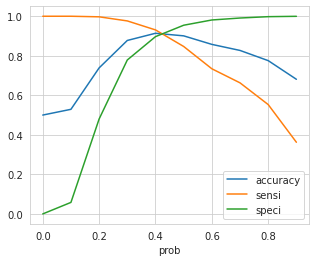

In [ ]:
### plot the selectivity, senstivity and Specificity at different cutoffs
from matplotlib.pyplot import figure

figure(num=None, figsize=(8,6), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams['figure.figsize'] = (5,4)
sns.set_style('whitegrid')
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()


In [ ]:
### predict values on selected cutoff
temp=y_train_adasyn_pred_300_400[['Class_actual','prob']]
temp['Class_predicted']=temp.prob.map(lambda x: 1 if x>0.42 else 0)
y_train_adasyn_pred_300_400=temp
y_train_adasyn_pred_300_400.head()


,Class_actual,prob,Class_predicted
0,0,0.245606,0
1,0,0.171453,0
2,0,0.134301,0
3,0,0.313905,0
4,0,0.118548,0


In [ ]:
### Accuracy
metrics.accuracy_score(y_train_adasyn_pred_300_400.Class_actual,y_train_adasyn_pred_300_400.Class_predicted)

0.910333930370255

In [ ]:

### Confusion matrix

#confusion Matrix
confusion_gs_300_400_train_ada=metrics.confusion_matrix(y_train_adasyn_pred_300_400.Class_actual,y_train_adasyn_pred_300_400.Class_predicted)
print(confusion_gs_300_400_train_ada)

[[181364  17650]
 [ 18044 181019]]


In [ ]:
### Print Other metrics
TP=confusion_gs_300_400_train_ada[1,1]
TN=confusion_gs_300_400_train_ada[0,0]
FP=confusion_gs_300_400_train_ada[0,1]
FN=confusion_gs_300_400_train_ada[1,0]
## Sestivity
print("Senstivity of the model is ",TP/float(TP+FN))
## Specifity
print("Specifity of the model is ",TN/float(TN+FP))
## Precision
print("Precision of the model is ",TP/float(TP+FP))
## Recall 
print("Recall of the model is ",TP/float(TP+FN))



Senstivity of the model is  0.909355329719737
Specifity of the model is  0.9113127719657913
Precision of the model is  0.9111587615581697
Recall of the model is  0.909355329719737


In [ ]:
### Apply ada on test set as well
X_test_adasyn, y_test_adasyn = ada.fit_sample(X_test, y_test)

In [ ]:
### Prediction on test_ada
y_test_adasyn_pred_300_400=rf_300_400_bal_ada.predict(X_test_adasyn)
temp=pd.DataFrame(y_test_adasyn_pred_300_400)
temp=temp.rename(columns={0: 'prob'})
temp2=pd.DataFrame(y_test_adasyn)
temp2.columns=['Class']
temp2=temp2.reset_index()
temp['Class_actual']=temp2['Class']
y_test_adasyn_pred_300_400=temp
y_test_adasyn_pred_300_400.head()

,prob,Class_actual
0,0.135550,0
1,0.283387,0
2,0.124811,0
3,0.234139,0
4,0.835205,0


In [ ]:
temp=y_test_adasyn_pred_300_400[['Class_actual','prob']]
temp['Class_predicted']=temp.prob.map(lambda x: 1 if x>0.42 else 0)
y_test_adasyn_pred_300_400=temp
y_test_adasyn_pred_300_400.head()

,Class_actual,prob,Class_predicted
0,0,0.135550,0
1,0,0.283387,0
2,0,0.124811,0
3,0,0.234139,0
4,0,0.835205,1


In [ ]:
### Check the accuracy of the random forest model

metrics.accuracy_score(y_test_adasyn_pred_300_400.Class_actual,y_test_adasyn_pred_300_400.Class_predicted)

0.8815095312902999

In [ ]:
### test confusion metrics
confusion_gs_test_300_400_M1=metrics.confusion_matrix(y_test_adasyn_pred_300_400.Class_actual,y_test_adasyn_pred_300_400.Class_predicted)
print(confusion_gs_test_300_400_M1)


[[77545  7756]
 [12458 72837]]


In [ ]:
### Other metrics on test
TP=confusion_gs_test_300_400_M1[1,1]
TN=confusion_gs_test_300_400_M1[0,0]
FP=confusion_gs_test_300_400_M1[0,1]
FN=confusion_gs_test_300_400_M1[1,0]
## Sestivity
print("Senstivity of the model is ",TP/float(TP+FN))
## Specifity
print("Specifity of the model is ",TN/float(TN+FP))
## Precision
print("Precision of the model is ",TP/float(TP+FP))
## Recall 
print("Recall of the model is ",TP/float(TP+FN))

Senstivity of the model is  0.8539422005979248
Specifity of the model is  0.9090749229200127
Precision of the model is  0.9037633541374561
Recall of the model is  0.8539422005979248


### Let's now create the random forest model on 500 trees

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 500 decision trees
rf_bl_ada = RandomForestRegressor(n_estimators = 500, random_state = 42)
# Train the model on training data
rf_bl_ada.fit(X_train_adasyn, y_train_adasyn)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
rf_bl_ada.base_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
# make predictions on test data
y_train_bal_pred_rf_bal = rf_bl_ada.predict(X_train_adasyn)
temp=pd.DataFrame(y_train_bal_pred_rf_bal)
temp=temp.rename(columns={0: 'prob'})
temp2=pd.DataFrame(y_train_adasyn)
temp2.columns=['Class']
temp2= temp2.reset_index()
temp['Class_actual']=temp2['Class']
y_train_bal_pred_rf_bal=temp
y_train_bal_pred_rf_bal.head()

,prob,Class_actual
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0


In [ ]:
prob=[float(x/10) for x in range(10)]
for i in prob:
    y_train_bal_pred_rf_bal[i]=y_train_bal_pred_rf_bal.prob.map(lambda x: 1 if x>i else 0)
y_train_bal_pred_rf_bal.head()

,prob,Class_actual,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = prob
for i in num:
    cm1 = metrics.confusion_matrix(y_train_bal_pred_rf_bal.Class_actual, y_train_bal_pred_rf_bal[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.980544,1.000000,0.961083
0.1,0.1,0.998704,1.000000,0.997407
0.2,0.2,0.999560,1.000000,0.999121
0.3,0.3,0.999852,1.000000,0.999704
0.4,0.4,1.000000,1.000000,1.000000
0.5,0.5,1.000000,1.000000,1.000000
0.6,0.6,1.000000,1.000000,1.000000
0.7,0.7,0.999977,0.999955,1.000000
0.8,0.8,0.999937,0.999874,1.000000
0.9,0.9,0.999799,0.999598,1.000000


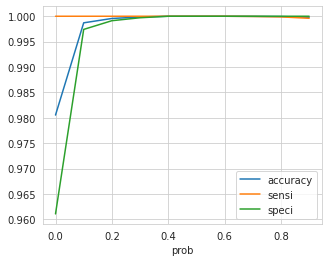

In [ ]:
sns.set_style('whitegrid')
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])

In [ ]:
temp=y_train_bal_pred_rf_bal[['Class_actual','prob']]
temp['Class_predicted']=temp.prob.map(lambda x: 1 if x>0.35 else 0)
y_train_bal_pred_rf_bal=temp
y_train_bal_pred_rf_bal.head()

,Class_actual,prob,Class_predicted
0,0,0.0,0
1,0,0.0,0
2,0,0.0,0
3,0,0.0,0
4,0,0.0,0


In [ ]:
### Check the accuracy of the random forest model
metrics.accuracy_score(y_train_bal_pred_rf_bal.Class_actual,y_train_bal_pred_rf_bal.Class_predicted)

0.9999572946942425

In [ ]:
#confusion Matrix
confusion_train_bal_rf_bal=metrics.confusion_matrix(y_train_bal_pred_rf_bal.Class_actual,y_train_bal_pred_rf_bal.Class_predicted)
print(confusion_train_bal_rf_bal)

[[198997     17]
 [     0 199063]]


In [ ]:
TP=confusion_train_bal_rf_bal[1,1]
TN=confusion_train_bal_rf_bal[0,0]
FP=confusion_train_bal_rf_bal[0,1]
FN=confusion_train_bal_rf_bal[1,0]
## Sestivity
print("Senstivity of the model is ",TP/float(TP+FN))
## Specifity
print("Specifity of the model is ",TN/float(TN+FP))
## Precision
print("Precision of the model is ",TP/float(TP+FP))
## Recall 
print("Recall of the model is ",TP/float(TP+FN))

Senstivity of the model is  1.0
Specifity of the model is  0.999914578873848
Precision of the model is  0.9999146071930882
Recall of the model is  1.0


In [ ]:
# make predictions on test data
y_test_pred_rf_bal = rf_bl_ada.predict(X_test_adasyn)
temp=pd.DataFrame(y_test_pred_rf_bal)
temp=temp.rename(columns={0: 'prob'})
temp2=pd.DataFrame(y_test_adasyn)
temp2.columns=['Class']
temp2= temp2.reset_index()
temp['Class_actual']=temp2['Class']
y_test_pred_rf_bal=temp
y_test_pred_rf_bal.head()

,prob,Class_actual
0,0.000,0
1,0.000,0
2,0.000,0
3,0.000,0
4,0.008,0


In [ ]:
temp=y_test_pred_rf_bal[['Class_actual','prob']]
temp['Class_predicted']=temp.prob.map(lambda x: 1 if x>0.3 else 0)
y_test_pred_rf_bal=temp
y_test_pred_rf_bal.head()

,Class_actual,prob,Class_predicted
0,0,0.000,0
1,0,0.000,0
2,0,0.000,0
3,0,0.000,0
4,0,0.008,0


In [ ]:
### Check the accuracy of the random forest model

metrics.accuracy_score(y_test_pred_rf_bal.Class_actual,y_test_pred_rf_bal.Class_predicted)

0.7688339703158339

In [ ]:
#confusion Matrix
confusion_test_rf_bal=metrics.confusion_matrix(y_test_pred_rf_bal.Class_actual,y_test_pred_rf_bal.Class_predicted)
print(confusion_test_rf_bal)

[[85072   229]
 [39207 46088]]


In [ ]:
TP=confusion_test_rf_bal[1,1]
TN=confusion_test_rf_bal[0,0]
FP=confusion_test_rf_bal[0,1]
FN=confusion_test_rf_bal[1,0]
## Sestivity
print("Senstivity of the model is ",TP/float(TP+FN))
## Specifity
print("Specifity of the model is ",TN/float(TN+FP))
## Precision
print("Precision of the model is ",TP/float(TP+FP))
## Recall 
print("Recall of the model is ",TP/float(TP+FN))

Senstivity of the model is  0.5403364792778006
Specifity of the model is  0.9973153890341262
Precision of the model is  0.9950558110413024
Recall of the model is  0.5403364792778006


##### Build models on other algorithms to see the better performing on ADASYN

### Below are the metrics for all the models build so far

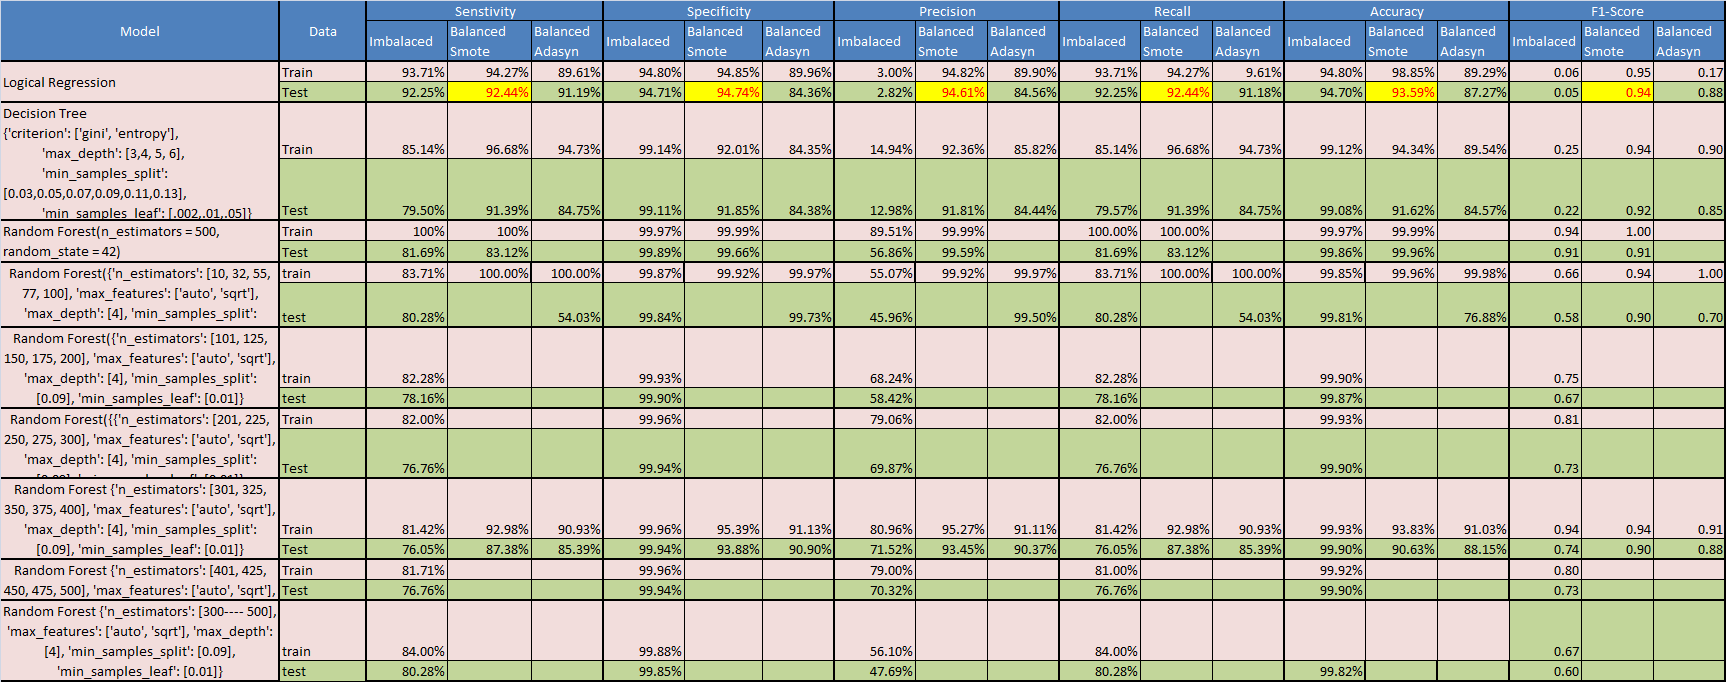

### So the best model created is logistic regression on Smote- balanced data set
- F1 Score - 0.94
- Precision - 94.61%
- Recall - 92.44%
- Senstivity - 92.44% 
- Specificity - 94.74%
- Accuracy - 93.59%
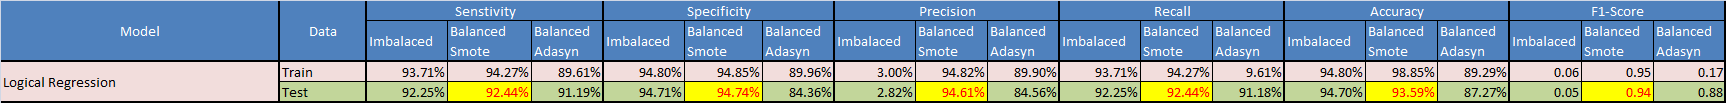

### 94.61% precision means , what ever our model predict as fradulent transactions out of those 94.61% are actually fradulent transactions, hence very less 5.39% transactions are wrongly identified as frauds. Hence very low costomer dissatisfaction 
### 92.44% Recall means that out of all the fraud transactions 92.44% transactions will be predicted by model as fraud. 

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [126]:
pipe=Pipeline(memory=None,
         steps=[('logistic',
                 LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)
final_model = GridSearchCV(estimator=pipe, cv=4, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)



In [127]:
final_model.fit(X_train_smote,y_train_smote)

Fitting 4 folds for each of 32 candidates, totalling 128 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:   43.9s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('logistic',
                                        LogisticRegression(C=0.1,
                                                           class_weight='balanced',
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                           random_state=None,
                                      

In [129]:
### Apply smote on test set as well
X_test_smote, y_test_smote = sm.fit_sample(X_test, y_test)

In [139]:
## Predict the y values
y_test_pred=final_model.predict_proba(X_test_smote)
y_test_pred = pd.DataFrame.from_records(y_test_pred)
y_test_pred=y_test_pred.rename(columns={0: 'prob_0',1:'prob_1'})
### Convert y_test_smote to a data_frame and reset the index pr_id as a column
temp2=pd.DataFrame(y_test_smote)
temp2.columns=['Class']
temp2= temp2.reset_index()
y_test_pred['index']=temp2['index']
y_test_pred['Class_actual']=temp2['Class']
temp=y_test_pred[['index','Class_actual','prob_1']]
temp['Class_predicted']=temp.prob_1.map(lambda x: 1 if x>0.3 else 0)
y_test_pred=temp
y_test_pred.head()

,index,Class_actual,prob_1,Class_predicted
0,0,0,0.020706,0
1,1,0,0.147705,0
2,2,0,0.057845,0
3,3,0,0.014922,0
4,4,0,0.983251,1


In [140]:
#confusion Matrix
confusion_test=metrics.confusion_matrix(y_test_pred.Class_actual,y_test_pred.Class_predicted)
print(confusion_test)

[[80816  4485]
 [ 6445 78856]]


In [141]:
TP=confusion_test[1,1]
TN=confusion_test[0,0]
FP=confusion_test[0,1]
FN=confusion_test[1,0]
## Sestivity
print("Senstivity of the model is ",TP/float(TP+FN))
## Specifity
print("Specifity of the model is ",TN/float(TN+FP))
## Precision
print("Precision of the model is ",TP/float(TP+FP))
## Recall 
print("Recall of the model is ",TP/float(TP+FN))

Senstivity of the model is  0.9244440276198403
Specifity of the model is  0.9474214839216422
Precision of the model is  0.9461849509845094
Recall of the model is  0.9244440276198403


In [142]:
metrics.accuracy_score(y_test_pred.Class_actual,y_test_pred.Class_predicted)

0.9359327557707413

### Print the important features of the best model to understand the dataset

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [ ]:
print('Train auc =', metrics.roc_auc_score(_________)
fpr, tpr, thresholds = metrics.roc_curve(_________)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)